# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import importlib
import seaborn as sns
import gc  # garbage collector
import os

from typing import List

import src.utils.utils as dp  # own functions and logic
importlib.reload(dp)  # this makes it so that 
                      # the file with our functions is re-read every time, 
                      # in case we have made modifications

<module 'src.utils.utils' from '/Users/lams/Desktop/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py'>

# Configure path to data files

In [2]:
# define the path to the folder where the YouNiverse dataset is stored here

# when adding your own path, don't remove the existing path, just comment it
# in this way, everyone can quickly uncomment their own path
#dataset_root_path = "/media/andreas/Backup Plus/Ada/youniverse_dataset/"   #andreas
#dataset_root_path = "D:/ada_project/dataset/"                                    #mila
# dataset_root_path = "/Volumes/DISQUE_SAUVEGARDE_MANON_LANDRIEUX/dataset/"  #manon
dataset_root_path = "/Volumes/Backup/Youniverse_dataset/" #Lou-Anne 

# Preprocessing

## Loading the data - done in order to know how the data looks like

In [3]:
# load channel data (no chunks needed, as the file is not very large)


df_channels = pd.read_csv(dataset_root_path + "df_channels_en.tsv.gz", compression="infer", sep="\t") 

In [29]:
# load a small part of video and comment data, to try functions on them etc.
# these datasets should not be used for calculations, as they don't contain all the data

# load (first 100000 rows of) video data

df_videos = pd.read_json(dataset_root_path + "yt_metadata_en.jsonl.gz", compression="infer", lines=True, nrows=100000) 

# load (first 1000000 rows of) comment data

df_comments = pd.read_csv(dataset_root_path + "youtube_comments.tsv.gz", compression="infer", sep="\t", nrows=1000000)

In [4]:
def videos_in_chunks( chunksize: int = 100000) -> pd.io.json._json.JsonReader:
    """
    Returns a Json reader which can be iterated through, to get chunks of the (unfiltered) video dataset.

    Args:
        chunksize: number of entries in each chunk

    Returns:
        the Json reader
    """
    return pd.read_json(dataset_root_path + "yt_metadata_en.jsonl.gz", 
                        compression="infer", lines=True, chunksize=chunksize, 
                        nrows=1000000, )   # uncomment this to only use the first million videos, for testing
                                           # (remove the paranthesis above as well)

def comments_in_chunks(chunksize: int = 1000000) -> pd.io.parsers.readers.TextFileReader:
    """
    Returns a CSV reader which can be iterated through, to get chunks of the (unfiltered) comment dataset.

    Args:
        chunksize: number of entries in each chunk

    Returns:
        the CSV reader
    """
    return pd.read_csv(dataset_root_path + "youtube_comments.tsv.gz", 
                       compression="infer", sep="\t", chunksize=chunksize, 
                       nrows = 10000000)  # uncomment this to only use the first 10 million comments, for testing
                                            # (remove the paranthesis above as well)

## Filtering for NaNs,empty values and possible spaces

## 1. Analyzing if filtering is needed

In [5]:
#to create the filepath for the different get entries below , need to have "../generated_data" which exists:

# Define the path to the directory
output_dir = os.path.join(dataset_root_path, "../generated_data")

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

### a. Youtube Comments 

In [11]:
# get the entries of the comment dataframe which have a NaN value, empty string or space in any column

nans_empty_space_comments_filepath = dataset_root_path + "../generated_data/nan_empty_space_rows_in_comment_dataset.csv"  # path to file with nans in comment dataset

try:  # try to read the data from file
    df_nans_empty_space_in_comments = pd.read_csv(nans_empty_space_comments_filepath)
except FileNotFoundError:  # if the file is not found...
    # ... then generate the file
    df_nans_empty_space_in_comments = dp.run_simple_function_on_chunks_concat(comments_in_chunks(1000000), 
                                                                              lambda x: dp.get_na_empty_space_entries(x, "any", reverse=False),
                                                                              print_time=(1000000, 8600000000))
    
    df_nans_empty_space_in_comments.to_csv(nans_empty_space_comments_filepath, index=False)


Going through chunk 0...
The first 1000000 entries have been processed. 8599000000 left.
0.897 secs per chunk on average. Meaning  128.537 minutes left.
Going through chunk 1...
The first 2000000 entries have been processed. 8598000000 left.
1.074 secs per chunk on average. Meaning  153.970 minutes left.
Going through chunk 2...
The first 3000000 entries have been processed. 8597000000 left.
1.055 secs per chunk on average. Meaning  151.110 minutes left.
Going through chunk 3...
The first 4000000 entries have been processed. 8596000000 left.
1.038 secs per chunk on average. Meaning  148.714 minutes left.
Going through chunk 4...
The first 5000000 entries have been processed. 8595000000 left.
1.028 secs per chunk on average. Meaning  147.308 minutes left.
Going through chunk 5...
The first 6000000 entries have been processed. 8594000000 left.
1.023 secs per chunk on average. Meaning  146.550 minutes left.
Going through chunk 6...
The first 7000000 entries have been processed. 8593000000

### b. Videos (youtube metadata)

In [13]:
# get the entries of the video dataframe which have a NaN value, empty string or space in any column

nans_empty_space_videos_filepath = dataset_root_path + "../generated_data/nan_empty_space_rows_in_video_dataset.csv"  # path to file with nans in video dataset

try:  # try to read the data from file
    df_nans_empty_space_in_videos = pd.read_csv(nans_empty_space_videos_filepath)
except FileNotFoundError:  # if the file is not found...
    # ... then generate the file
    df_nans_empty_space_in_videos = dp.run_simple_function_on_chunks_concat(videos_in_chunks(), 
                                                                            lambda x: dp.get_na_empty_space_entries(x, "any", reverse=False),
                                                                            print_time=(1000000, 8600000000))
    df_nans_empty_space_in_videos.to_csv(nans_empty_space_videos_filepath, index=False)

Going through chunk 0...


/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_entries['char'] = 'na'
/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_entries['char'] = 'empty'


The first 1000000 entries have been processed. 8599000000 left.
0.891 secs per chunk on average. Meaning  127.632 minutes left.
Going through chunk 1...


/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_entries['char'] = 'na'
/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_entries['char'] = 'empty'


The first 2000000 entries have been processed. 8598000000 left.
0.882 secs per chunk on average. Meaning  126.323 minutes left.
Going through chunk 2...


/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_entries['char'] = 'na'
/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_entries['char'] = 'empty'


The first 3000000 entries have been processed. 8597000000 left.
0.889 secs per chunk on average. Meaning  127.449 minutes left.
Going through chunk 3...


/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_entries['char'] = 'na'
/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_entries['char'] = 'empty'


The first 4000000 entries have been processed. 8596000000 left.
0.884 secs per chunk on average. Meaning  126.643 minutes left.
Going through chunk 4...


/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_entries['char'] = 'na'
/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_entries['char'] = 'empty'


The first 5000000 entries have been processed. 8595000000 left.
0.984 secs per chunk on average. Meaning  140.962 minutes left.
Going through chunk 5...


/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_entries['char'] = 'na'
/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_entries['char'] = 'empty'


The first 6000000 entries have been processed. 8594000000 left.
0.951 secs per chunk on average. Meaning  136.227 minutes left.
Going through chunk 6...


/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_entries['char'] = 'na'
/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_entries['char'] = 'empty'


The first 7000000 entries have been processed. 8593000000 left.
0.932 secs per chunk on average. Meaning  133.548 minutes left.
Going through chunk 7...


/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_entries['char'] = 'na'
/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_entries['char'] = 'empty'


The first 8000000 entries have been processed. 8592000000 left.
0.917 secs per chunk on average. Meaning  131.250 minutes left.
Going through chunk 8...


/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_entries['char'] = 'na'
/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_entries['char'] = 'empty'


The first 9000000 entries have been processed. 8591000000 left.
0.916 secs per chunk on average. Meaning  131.123 minutes left.
Going through chunk 9...


/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_entries['char'] = 'na'
/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_entries['char'] = 'empty'


The first 10000000 entries have been processed. 8590000000 left.
0.915 secs per chunk on average. Meaning  131.019 minutes left.


### c. Channels

In [14]:
# get the entries of the channel dataframe which have a NaN value, empty string or space in any column

nans_empty_space_channels_filepath = dataset_root_path + "../generated_data/nan_empty_space_rows_in_channel_dataset.csv"  # path to file with nans in channel dataset

try:  # try to read the data from file
    df_nans_empty_space_in_channels = pd.read_csv(nans_empty_space_channels_filepath)
except FileNotFoundError:  # if the file is not found...
    # ... then generate the file
    df_nans_empty_space_in_channels = dp.get_na_empty_space_entries(df_channels, "any", reverse=False)

    df_nans_empty_space_in_channels.to_csv(nans_empty_space_channels_filepath, index=False)

/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/src/utils/utils.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_entries['char'] = 'na'


In [15]:
#display to be sure this are not empty, alarming us that some data need to be discard.

display(df_nans_empty_space_in_comments)
display(df_nans_empty_space_in_videos)
display(df_nans_empty_space_in_channels)

,author,video_id,likes,replies,char


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,char
2037,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:29:13.871524,Play all my games at http://www.retrogamer3.co...,NaN,KdoFvAgj2pA,647,NaN,"NES,Disassemble,RetroGamer3,72,pin,card,replac...",NES Disassemble by RetroGamer3,2011-10-25 00:00:00,16742.0,na
2615,Gaming,UCzWfqsjlvzAOUozsGFR3kbg,2019-10-31 15:41:40.351811,FREE POKECOINS HERE!\nStep by Step Guide:\n1. ...,NaN,Rigecg1Tw3Q,87,NaN,"Pokemon Go,Pokemon,go,free,pokemon go pokecoin...",FREE UNLIMITED POKECOINS :: POKEMON GO :: MORE...,2016-07-12 00:00:00,46635.0,na
7937,Music,UCzWLloEwMWZYnUErRF5WWCg,2019-11-19 14:22:01.132899,DOWNLOAD FOR FREE MY 10 TIPS CHECKLIST TO HELP...,NaN,z1IBWQusOWc,55,NaN,"piano,pianist,cover,live,musician,creative,tut...",50 Cent - In Da Club (Piano Tutorial),2019-04-24 00:00:00,5790.0,na
7977,Music,UCzWLloEwMWZYnUErRF5WWCg,2019-11-19 14:22:30.010478,DOWNLOAD FOR FREE MY 10 TIPS CHECKLIST TO HELP...,NaN,gIm1ETMO-hE,269,NaN,"piano,pianist,cover,live,musician,creative,tut...",Awolnation - Sail (Piano Tutorial),2019-04-14 00:00:00,15617.0,na
7987,Music,UCzWLloEwMWZYnUErRF5WWCg,2019-11-19 14:21:37.516545,DOWNLOAD FOR FREE MY 10 TIPS CHECKLIST TO HELP...,NaN,cLJw8DHyJBE,149,NaN,"piano,pianist,cover,live,musician,creative,tut...",Fortnite Better Give Me My Kids Back (Fgteev) ...,2019-03-13 00:00:00,18663.0,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999876,People & Blogs,UCrUkgG9ychiQ0WvbiwdlP1w,2019-11-13 20:40:53.349743,Support future streams: Buy me a Ko-fi!\nhttps...,8.0,q9hFysLAjUk,8397,351.0,,Goth GF Starfire Mukbang,2018-03-31 00:00:00,38147.0,empty
999953,Howto & Style,UCrUfjMyHTAMQ8_OnM2nJFlw,2019-11-22 20:07:59.554309,http://twitch.tv/thekingkevin\n\nSubscribe to ...,0.0,BMG0qrEiP3Q,25,34.0,,I'm on Twitch?! [Updated],2016-02-15 00:00:00,1653.0,empty
999955,Howto & Style,UCrUfjMyHTAMQ8_OnM2nJFlw,2019-11-22 20:07:05.734691,,NaN,P-b9O9WwPaY,1530,NaN,,Answers to Q&A - Pen Spinning Stuff,2015-05-24 00:00:00,9298.0,empty
999958,Science & Technology,UCrUfjMyHTAMQ8_OnM2nJFlw,2019-11-22 20:07:07.629776,"So as many of you probably know, the new iPhon...",6.0,tFhgS6EX-CM,13,285.0,,Pen Spinning at 120fps (iPhone 5S),2013-10-26 00:00:00,20570.0,empty


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,char
62,Entertainment,NaN,UCBR8-60-B28hp2BmDPdntcQ,YouTube,28200000,301,110.0,2.0870,na
6941,NaN,2009-05-12,UCa_4DcdTB9QfK0LY9-7qWuQ,AbbaVEVO,995000,36,17265.0,2.8200,na
8295,NaN,2012-12-23,UCVOftvvuyipcn7102TUFsSQ,Baka Oppai,760128,27,21172.0,2.9225,na
8885,NaN,2009-06-05,UCqH2YMSzMaGN92Vc3VkhWnQ,Sony Pictures Home E...,770000,6561,22799.0,2.9595,na
10449,NaN,2009-10-15,UCnzCV_PxVZ-hsOrTy2NGxJw,EuropeVEVO,654000,19,27450.0,2.9825,na
...,...,...,...,...,...,...,...,...,...
135072,NaN,2012-02-04,UCfRjxraogo4vwPSajqZUnhg,Johnny Marsiglia & B...,10300,22,935163.0,24.2090,na
135287,NaN,2009-03-18,UCBkyyLkDRd_iql_OWY87BOA,SHARKSANDCREATURES,10500,139,937947.0,28.1220,na
135326,NaN,2016-07-24,UCfL3FVHRncVVoBnVI_EI8vw,spoiled milk,10600,33,938514.0,28.9550,na
136264,NaN,2013-01-28,UC1uzi-DavAwqFp4SWR3XKfA,THEKONDOR,10300,108,977157.0,53.1435,na


### Analysis
The 10000000 first rows of each of the dataframes (comments, videos and channels) were taken to build 3 dataframes. Those latter are each composed of the rows containing empty, space and NaN characters of the inital dataframes. 

Looking at the comments dataframe , an empty dataframe was returned. While it may seem unusual, looking at the information the comment dataset contains it makes sense that there are no columns (like, user_id...) with missing values. As it is empty , the dataframe is not broken either. Therefore no cleaning is necessary.

Looking at the df_nans_empty_space_in_channels, we see that most of the unknown values are in the categories , which is a crucial data for our analysis therefore we discard all rows with unknown values for the channels. 

Looking at the df_nans_empty_space_in_videos, we see that it is mainly the tags and likes and dislike counts which have their values missing. As we may need those data and want to get rid of all unknown values we remove all rows with unknown values for the videos. 

Overall the dataframes are large enough to allow that therefore the analysis will still be accurate.

In [ ]:
# delete the dataframes with nans, as we are done with the analysis at this point and no longer need them.

del df_nans_empty_space_in_comments
del df_nans_empty_space_in_videos
del df_nans_empty_space_in_channels


gc.collect()

1187

## 2. Cleaning of files: replacing empty character '' with NaN and remove all rows containing NaN

**df_channels** is treated separetly because the file is much smaller, it doesn't need to be treated in chuncks.


In [6]:
#clean df_channel and save 

channels_clean_filepath = dataset_root_path + "../generated_data/df_channels_clean.csv"

try:
    df_channels_clean = pd.read_csv(channels_clean_filepath)
    print("Read data from file")
except FileNotFoundError:
    df_channels_clean = dp.clean(df_channels, save=False)
    df_channels_clean.to_csv(channels_clean_filepath, index=False)


display(len(df_channels_clean))
display(len(df_channels))

#one can understand that the new dataframe that will be using from now on will be df_channels_clean

Read data from file


136331

136470

When cleaning **chunks**, we need to use another function run_simple_function_on_chuncks_save_csv, that will iterate and clean the dataframe chunks after chunks, allowing faster code. Then, the new files are save in another dataframe. Similarly, only the clean dataframe will be used afterwards.

In [7]:
# clean the other two dataframes

comments_clean_filepath = dataset_root_path + "../generated_data/df_comments_clean.csv"

if os.path.isfile(comments_clean_filepath):
    print("File already exists, no need to generate again. Delete or rename the file to regenerate it.")
else:
    dp.run_simple_function_on_chunks_save_csv(reader=comments_in_chunks(1000000), 
                                              fct=lambda df: dp.clean(df, save=False), 
                                              filename=comments_clean_filepath,
                                              index=False,
                                              every=30,
                                              overwrite=False,
                                              print_time=(1000000, 8600000000))

videos_clean_filepath = dataset_root_path + "../generated_data/df_videos_clean.csv"

if os.path.isfile(videos_clean_filepath):
    print("File already exists, no need to generate again. Delete or rename the file to regenerate it.")
else:
    dp.run_simple_function_on_chunks_save_csv(reader=videos_in_chunks(100000), 
                                              fct=lambda df: dp.clean(df, save=False), 
                                              filename=videos_clean_filepath,
                                              index=False,
                                              every=15,
                                              overwrite=False,
                                              print_time=(100000, 72924794))

File already exists, no need to generate again. Delete or rename the file to regenerate it.
File already exists, no need to generate again. Delete or rename the file to regenerate it.


In [13]:
# define new readers, as videos_in_chunks and comments_in_chunks used the uncleaned versions:

def videos_in_chunks_clean(chunksize: int = 100000) -> pd.io.json._json.JsonReader:
    """
    Returns a Json reader which can be iterated through, to get chunks of the video dataset, with nans etc removed (cleaned).

    Args:
        chunksize: number of entries in each chunk

    Returns:
        the Json reader
    """
    return pd.read_csv(videos_clean_filepath,
                       compression="infer", chunksize=chunksize, )
                        #nrows=1000000, )   # uncomment this to only use the first million videos, for testing
                                          # (remove the paranthesis above as well)

#no need to redefine the comments_in_chuncks, as we did no cleaning


# Why News and Politics ?

With this analysis we want to investigate how popular the News&Politics category is both in videos and channels. 
News and Politics were chosen as it is a interesting subject to see if groups are isolated. But what is its position among all Youtube categories?

#### 1. Distribution of categories for the channels

Loaded data from file


,category_cc,number_of_channels
0,Autos & Vehicles,3705
1,Comedy,3767
2,Education,7803
3,Entertainment,22944
4,Film and Animation,6875
5,Gaming,20141
6,Howto & Style,11875
7,Music,24283
8,News & Politics,2263
9,Nonprofits & Activism,969


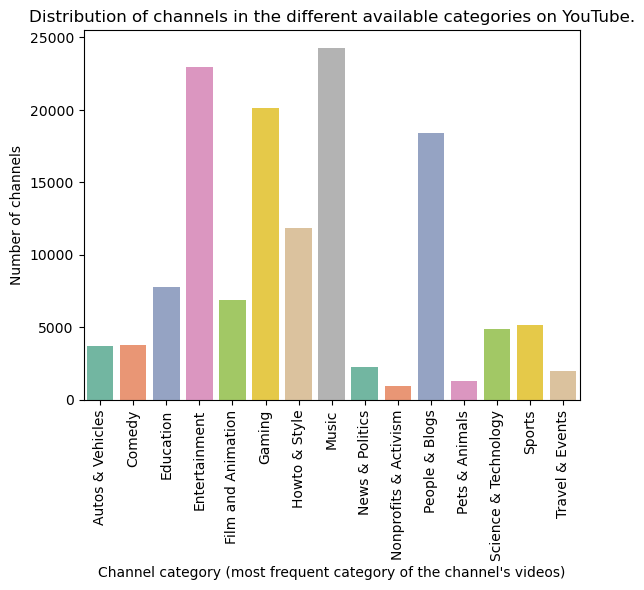

In [10]:
channels_by_category_filepath = dataset_root_path + "../generated_data/channel_count_per_category.csv"

try:  # try to read data from file
    channels_per_category = pd.read_csv(channels_by_category_filepath)
    print("Loaded data from file")
except FileNotFoundError:  # if file does not exist, generate it and save
    channels_per_category = df_channels_clean.groupby('category_cc').agg(number_of_channels=('category_cc', 'size')).reset_index()
    channels_per_category.to_csv(channels_by_category_filepath, index=False)

display(channels_per_category)


ax = sns.barplot(x="category_cc", y="number_of_channels", data=channels_per_category,hue="category_cc", palette='Set2')
plt.xticks(rotation=90)
plt.title("Distribution of channels in the different available categories on YouTube.")
plt.xlabel("Channel category (most frequent category of the channel's videos)")
plt.ylabel("Number of channels")
plt.show()

 
One can see that the number of channels corresponding to News&Politics category is very low ! This category is even one of the smallest. What about the number of corresponding videos ?

#### 1. Distribution of categories for the channels

Data read from file
    Unnamed: 0               category  total_count
0            0          Entertainment   10792801.0
1            1                 Gaming   12536769.0
2            2                  Music    7289802.0
3            3        News & Politics    7551328.0
4            4         People & Blogs    5193647.0
5            5          Howto & Style    3547454.0
6            6        Travel & Events     954502.0
7            7   Science & Technology    2137297.0
8            8                 Comedy     895662.0
9            9                 Sports    3729555.0
10          10              Education    3146188.0
11          11       Film & Animation    1928750.0
12          12         Pets & Animals     536281.0
13          13       Autos & Vehicles    1977948.0
14          14  Nonprofits & Activism     610451.0
15          15                  Shows         41.0
16          16                 Movies          5.0


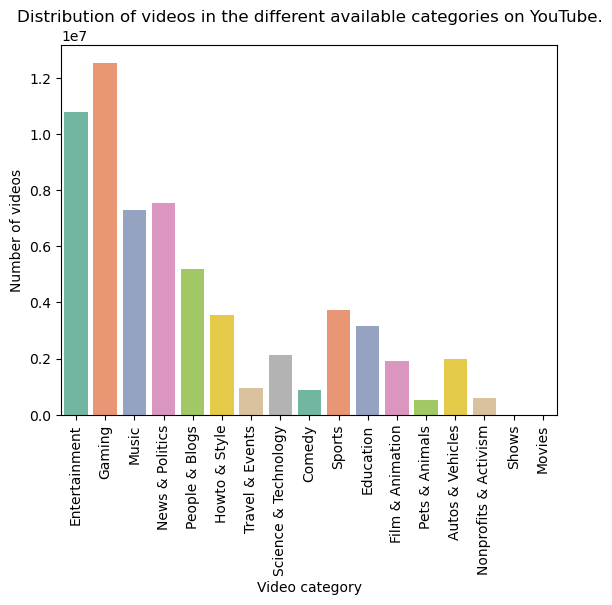

In [9]:
#distribution categories of videos over the whole (cleaned) dataset per chunck

# Define a function that processes a single chunk
def count_videos_by_category(chunk):
    
    # Count videos in each category within the chunk
    category_counts = chunk['categories'].value_counts().to_frame().T  # Get counts and transpose for one-row DataFrame
    category_counts.columns.name = None  # Remove column name for easy concatenation
    return category_counts

videos_by_category_filepath = dataset_root_path + "../generated_data/video_count_by_category.csv"

try:  # try to read the data from file
    videos_per_category_counts_total = pd.read_csv(videos_by_category_filepath)
    print("Data read from file")
except FileNotFoundError:  # otherwise, generate it and save

    # Apply the function to all chunks and get the results concatenated
    videos_per_category_counts_per_chunk = dp.run_simple_function_on_chunks_concat(
        videos_in_chunks_clean(chunksize=100000), 
        count_videos_by_category,
        print_time=(100000, 72924794)
        )

    # Sum the counts across all chunks to get the total count of videos per category
    videos_per_category_counts_total = videos_per_category_counts_per_chunk.sum().to_frame(name='total_count').reset_index()
    videos_per_category_counts_total.columns = ['category', 'total_count']

    videos_per_category_counts_total.to_csv(videos_by_category_filepath,)  # save the created dataframe so we don't have to generate it again


# Display the final distribution
print(videos_per_category_counts_total)

ax = sns.barplot(x="category", y="total_count", hue='category', legend=False, data=videos_per_category_counts_total, palette='Set2')
plt.xticks(rotation=90)
plt.title("Distribution of videos in the different available categories on YouTube.")
plt.xlabel("Video category")
plt.ylabel("Number of videos")
plt.show()

### Analysis 

It is apparent that there are fewer News & Politics channels compared to other categories. However, the proportion of News & Politics videos is much higher. This suggests that News & Politics channels are relatively active in posting content.

Therefore, studying News & Politics videos seems to be a worthwhile pursuit, even though it may not fully represent the broader YouTube community. One might also question whether a smaller category, like News & Politics, could be even more interesting than a larger one. A smaller category may become more isolated, potentially forming its own bubbles.




In [10]:
# delete the datasets, as we don't need them anymore

del videos_per_category_counts_total
del channels_per_category

## Filtering the datasets to our needs - News & Politics

### Filtering **videos** by category 'News & Politics'

In [32]:
# filter the video dataframe to only include videos from n&p category

videos_in_news_pol_filepath = dataset_root_path + "../generated_data/videos_in_news_pol.csv"

if os.path.isfile(videos_in_news_pol_filepath):  # if the file already exists
    print("File already exists, no need to generate again.\nDelete or rename the existing file in order to regenerate it.")
else:  # if not, generate the file. The data is directly saved to a new dataframe, 
       # because it would be to big to load in memory at once
    dp.run_simple_function_on_chunks_save_csv(videos_in_chunks_clean(chunksize=100000),
                                              lambda x: x[x.categories == "News & Politics"], 
                                              filename=videos_in_news_pol_filepath,
                                              index=False,
                                              overwrite=False,  # will not overwrite existing files
                                              every=15,  # will save to the csv every 15 chunks
                                              print_time=(100000, 72924794))
    
# a new filtered file is saved, this dataframe will be used from now on.

File already exists, no need to generate again.
Delete or rename the existing file in order to regenerate it.


In [16]:
# load the (large) csv file that was just written, containing the videos in news and politics, in chunks, 
# and print the head of the first chunk and the shape of each chunk (this is just to show that it worked)

print("News and politics videos:\n")

total_length = 0
for i, chunk in enumerate(pd.read_csv(dataset_root_path + "/../generated_data/videos_in_news_pol.csv", chunksize=100000)):
    
    if i == 0:
        print(f"Head of chunk 0: ")
        print(chunk[chunk.channel_id == "UCupvZG-5ko_eiXAupbDfxWw"])

        display(chunk.head())
        print("The shapes of all chunks:")
    print(f"Shape of chunk number {i}: {chunk.shape}")
    total_length += chunk.shape[0]

print(f"In total {total_length} rows, which takes up {i+1} chunks.")
del chunk

print(f"{gc.collect()} garbages collected.")

News and politics videos:

Head of chunk 0: 
Empty DataFrame
Columns: [categories, channel_id, crawl_date, description, dislike_count, display_id, duration, like_count, tags, title, upload_date, view_count]
Index: []


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,News & Politics,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:42.593675,retrogamer3.com,16.0,dfa8RRkKoa4,9251,25.0,"RetroGamer3,Live Stream,politics,Trump",Retrogamer3 Political Stream,2018-08-23 00:00:00,478.0
1,News & Politics,UCzWLsxDD373D4tY8kN-0LGQ,2019-11-05 00:42:33.012228,What are the forces at work that have created ...,0.0,_dIIEMvH86k,309,9.0,"NWO,Ebola,Ukraine,Mainstream,Media,Pyschology",Adam Curtis describes the Surkow Strategy of M...,2015-01-04 00:00:00,865.0
2,News & Politics,UCzVBu6oqlrAix0oq9T2rBFg,2019-11-19 20:40:22.403775,Social Media:\n\nFacebook.com/thebookoflaura\n...,89.0,eWXefhNB2po,707,625.0,"michael jackson,lyrics,music video,court,child...",my thoughts on the michael jackson documentary.,2019-04-24 00:00:00,12780.0
3,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:47:10.520209,👕 Order your shirts here: https://Teespring.co...,195.0,MBgzne7djFU,378,47027.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",Elizabeth Warren Gets a Big Surprise at the Ai...,2019-10-03 00:00:00,374711.0
4,News & Politics,UCzUV5283-l5c0oKRtyenj6Q,2019-11-22 08:46:16.481889,👕 Order your shirts here: https://Teespring.co...,114.0,AbH3pJnFgY8,278,36384.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",No More Twitter? 😂,2019-10-02 00:00:00,245617.0


The shapes of all chunks:
Shape of chunk number 0: (100000, 12)
Shape of chunk number 1: (100000, 12)
Shape of chunk number 2: (100000, 12)
Shape of chunk number 3: (100000, 12)
Shape of chunk number 4: (100000, 12)
Shape of chunk number 5: (100000, 12)
Shape of chunk number 6: (100000, 12)
Shape of chunk number 7: (100000, 12)
Shape of chunk number 8: (100000, 12)
Shape of chunk number 9: (100000, 12)
Shape of chunk number 10: (100000, 12)
Shape of chunk number 11: (100000, 12)
Shape of chunk number 12: (100000, 12)
Shape of chunk number 13: (100000, 12)
Shape of chunk number 14: (100000, 12)
Shape of chunk number 15: (100000, 12)
Shape of chunk number 16: (100000, 12)
Shape of chunk number 17: (100000, 12)
Shape of chunk number 18: (100000, 12)
Shape of chunk number 19: (100000, 12)
Shape of chunk number 20: (100000, 12)
Shape of chunk number 21: (100000, 12)
Shape of chunk number 22: (100000, 12)
Shape of chunk number 23: (100000, 12)
Shape of chunk number 24: (100000, 12)
Shape of 

/var/folders/xn/s7sjqvj94tx3n1l14fcw6f240000gq/T/ipykernel_9556/187265695.py:7: DtypeWarning: Columns (5,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(dataset_root_path + "/../generated_data/videos_in_news_pol.csv", chunksize=100000)):


Shape of chunk number 64: (100000, 12)


/var/folders/xn/s7sjqvj94tx3n1l14fcw6f240000gq/T/ipykernel_9556/187265695.py:7: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(dataset_root_path + "/../generated_data/videos_in_news_pol.csv", chunksize=100000)):


Shape of chunk number 65: (100000, 12)
Shape of chunk number 66: (100000, 12)
Shape of chunk number 67: (100000, 12)
Shape of chunk number 68: (100000, 12)


/var/folders/xn/s7sjqvj94tx3n1l14fcw6f240000gq/T/ipykernel_9556/187265695.py:7: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(dataset_root_path + "/../generated_data/videos_in_news_pol.csv", chunksize=100000)):


Shape of chunk number 69: (100000, 12)
Shape of chunk number 70: (100000, 12)


/var/folders/xn/s7sjqvj94tx3n1l14fcw6f240000gq/T/ipykernel_9556/187265695.py:7: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(dataset_root_path + "/../generated_data/videos_in_news_pol.csv", chunksize=100000)):


Shape of chunk number 71: (100000, 12)
Shape of chunk number 72: (100000, 12)
Shape of chunk number 73: (100000, 12)
Shape of chunk number 74: (100000, 12)
Shape of chunk number 75: (51328, 12)
In total 7551328 rows, which takes up 76 chunks.
894 garbages collected.


## Extracting just the *Video IDs* of the Videos in News & Politics in as a Series
(In order to be able to use this without loading the entire Videos in News & Politics DataFrame)

In [17]:
videos_news_pol_display_ids_filepath = dataset_root_path + "../generated_data/videos_news_pol_display_ids.csv"

try:
    df_videos_news_pol_display_ids = pd.read_csv(videos_news_pol_display_ids_filepath)
    print("Read data from file")
except FileNotFoundError:
    df_videos_news_pol_display_ids = dp.run_simple_function_on_chunks_concat(pd.read_csv(videos_in_news_pol_filepath, chunksize=100000),
                                                                                 fct = lambda df: df['display_id'],
                                                                                 print_time=True
                                                                                 )['display_id']
    df_videos_news_pol_display_ids.to_csv(videos_news_pol_display_ids_filepath, index=False)

Read data from file


### Filtering **channels** by category News & Politics

In [34]:
#filter channels dataset to only include n&p

# Note: because the channel dataset is much smaller than the video dataset, we don't need to worry about chunks here
# Also, the results can be saved in a single file without a problem.

channels_news_pol_filepath = dataset_root_path + "../generated_data/channels_in_news_pol.csv"

try:
    df_channels_news_pol = pd.read_csv(channels_news_pol_filepath)
    print("Read data from file")
except FileNotFoundError:
    df_channels_news_pol = df_channels_clean[df_channels_clean.category_cc == "News & Politics"]
    df_channels_news_pol.to_csv(channels_news_pol_filepath, index=False)

#this file will be used from now on

Read data from file


In [35]:
display(df_channels_news_pol.head())
display(df_channels_news_pol.shape)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,News & Politics,2006-08-26,UCttspZesZIDEwwpVIgoZtWQ,IndiaTV,15177282,139814,199.0,2.087
1,News & Politics,2012-06-01,UCRWFSbif-RFENbBrSiez1DA,ABP NEWS,16274836,129027,207.0,2.087
2,News & Politics,2017-03-03,UCmphdqZNmqL72WJ2uyiNw5w,ABP NEWS HINDI,10800000,51298,340.0,2.087
3,News & Politics,2015-03-23,UCx8Z14PpntdaxCt2hakbQLQ,The Lallantop,9120000,9423,438.0,2.087
4,News & Politics,2007-06-19,UCIvaYmXn910QMdemBG3v1pQ,Zee News,9280000,102648,549.0,2.087


(2263, 8)

### Checking whether all videos in News and Politics are also uploaded by a channel in that category

In [36]:
# check if all videos we found in news&pol are also published by a channel in category n&p

videos_news_pol__channel_not_news_pol_filepath = dataset_root_path + "../generated_data/videos_in_news_pol__channel_not_in_news_pol.csv"


try:
    df_videos_news_pol__channel_not_news_pol = pd.read_csv(videos_news_pol__channel_not_news_pol_filepath)
    print("Read data from file")
except FileNotFoundError:
    # go through the large file of news and politics videos in chunks, 
    # and extract all videos which were not uploaded by a News & Politics channel

    df_videos_news_pol__channel_not_news_pol = dp.run_simple_function_on_chunks_concat(
        reader=pd.read_csv(dataset_root_path + "../generated_data/videos_in_news_pol.csv", chunksize=100000),
        fct=lambda chunk: chunk[np.logical_not(chunk.channel_id.isin(df_channels_news_pol.channel))],
        print_time=True
        )

    # save the resuls to a csv
    df_videos_news_pol__channel_not_news_pol.to_csv(videos_news_pol__channel_not_news_pol_filepath, index=False)

        
display(df_videos_news_pol__channel_not_news_pol.head())
display(df_videos_news_pol__channel_not_news_pol.shape)



/var/folders/xn/s7sjqvj94tx3n1l14fcw6f240000gq/T/ipykernel_9556/3977544599.py:7: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_videos_news_pol__channel_not_news_pol = pd.read_csv(videos_news_pol__channel_not_news_pol_filepath)


Read data from file


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,News & Politics,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:42.593675,retrogamer3.com,16.0,dfa8RRkKoa4,9251,25.0,"RetroGamer3,Live Stream,politics,Trump",Retrogamer3 Political Stream,2018-08-23 00:00:00,478.0
1,News & Politics,UCzWLsxDD373D4tY8kN-0LGQ,2019-11-05 00:42:33.012228,What are the forces at work that have created ...,0.0,_dIIEMvH86k,309,9.0,"NWO,Ebola,Ukraine,Mainstream,Media,Pyschology",Adam Curtis describes the Surkow Strategy of M...,2015-01-04 00:00:00,865.0
2,News & Politics,UCzVBu6oqlrAix0oq9T2rBFg,2019-11-19 20:40:22.403775,Social Media:\n\nFacebook.com/thebookoflaura\n...,89.0,eWXefhNB2po,707,625.0,"michael jackson,lyrics,music video,court,child...",my thoughts on the michael jackson documentary.,2019-04-24 00:00:00,12780.0
3,News & Politics,UCzTmNzBxLEHbpZNOCpUTWbA,2019-11-03 04:38:01.617657,A young man is living a normal life with no ca...,16.0,ck6Yl8TNoWs,1257,452.0,"JoiRida,Cheatham,JoiRidaCheatham,Accepted,Detr...",Accepted - Award Winning Short Film,2013-10-13 00:00:00,27366.0
4,News & Politics,UCzTmNzBxLEHbpZNOCpUTWbA,2019-11-03 04:38:06.565138,Short Film,1.0,tjUajxZAIZ8,422,15.0,"Joi.Rida,Cheatham,joiridacheatham,dread,loc,up...",JoiRida Twin Visit (Introducing Jive Viper),2010-03-04 00:00:00,987.0


(541172, 12)

**We see that indeed, not all videos in the news and politics category belong to a channel in this category!**
A google search shows that apparently, you don't have to have the same category for all videos, but you set a "default" channel category which will be used for videos if you don't change it manually. Also, you can probably change the default category after a while if you want.

This is the reason why most of the news&pol videos are uploaded by a news&pol channel, but not all.

In the paper about the YouNiverse dataset, the authors say that the channel category is actually the "most frequent category". We believe that the video categories are the most relevant, as they are the 'true' categories of the content.

In [44]:
del df_videos_news_pol__channel_not_news_pol
print(gc.collect())

31


### Filtering the N&P videos by a list of channels

In [37]:
# define variables for the channel ids of CNN, ABC, BBC, Al Jazeera English and Fox
channel_id_cnn = "UCupvZG-5ko_eiXAupbDfxWw"  # CNN
channel_id_abc = "UCBi2mrWuNuyYy4gbM6fU18Q"  # ABC News
channel_id_bbc = "UC16niRr50-MSBwiO3YDb3RA"  # BBC News
channel_id_aje = "UCNye-wNBqNL5ZzHSJj3l8Bg"  # Al Jazeera English
channel_id_fox = "UCXIJgqnII2ZOINSWNOGFThA"  # Fox News

selected_channel_ids = [channel_id_cnn,
                        channel_id_abc,
                        channel_id_bbc,
                        channel_id_aje,
                        channel_id_fox]


In [38]:
# form the filtered N&P videos dataframe, keep those posted by channels manually selected (here CNN, ABC News, BBC News, Al Jazeera English and Fox News)

videos_news_pol_manual_selection_filepath = dataset_root_path + "../generated_data/videos_from_news_pol_from_selected_channels.csv"

try:
    df_videos_news_pol_manually_selected = pd.read_csv(videos_news_pol_manual_selection_filepath)
    print("Read data from file")
except FileNotFoundError:
    # go through the large file with videos in news and politics, 
    # and select those videos which are uploaded by one of our selected channels
    
    df_videos_news_pol_manually_selected = dp.run_simple_function_on_chunks_concat(
        reader=pd.read_csv(dataset_root_path + "../generated_data/videos_in_news_pol.csv", chunksize=100000), 
        fct=lambda chunk: chunk[chunk.channel_id.isin(selected_channel_ids)],
        print_time=False)
    
    # save the results to a csv
    df_videos_news_pol_manually_selected.to_csv(videos_news_pol_manual_selection_filepath, index=False)

display(df_videos_news_pol_manually_selected.head())
display(df_videos_news_pol_manually_selected.shape)


#checking if all channels are here and have videos
channel_ids = df_videos_news_pol_manually_selected.channel_id.unique()
print(channel_ids)

/var/folders/xn/s7sjqvj94tx3n1l14fcw6f240000gq/T/ipykernel_9556/3738770184.py:6: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_videos_news_pol_manually_selected = pd.read_csv(videos_news_pol_manual_selection_filepath)


Read data from file


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:25:52.312339,God's not Dead' now available on DVD\nWatch th...,3.0,Tu8LeamtOmc,252,6.0,"Fox Friends,Clayton Morris,Famous Faces,Faith,...",'Duck Dynasty' stars talk faith in entertainment,2014-12-29 00:00:00,344.0
1,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:25:55.983188,Shocking new tape reveals 15-year-old woman di...,2.0,a9RXcMkahu8,347,11.0,"Bill Oreilly,Oreilly Factor,Personal Freedoms,...",Planned Parenthood Controversy,2014-12-29 00:00:00,1057.0
2,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:26:01.107518,"Watters asks the folks of Cambridge, Massachus...",89.0,KrQu5grf5v8,277,1958.0,"Oreilly Factor,Bill Oreilly,Jesse Watters,Watt...",Watters' World: Free stuff edition,2014-12-29 00:00:00,244169.0
3,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:26:07.440358,New Pew poll shows 44 percent say they are not...,6.0,CVzmKWI2OXQ,283,12.0,"Bill Oreilly,Charles Krauthammer,Oreilly Facto...",What happened to patriotism?,2014-12-29 00:00:00,798.0
4,News & Politics,UCXIJgqnII2ZOINSWNOGFThA,2019-11-01 09:25:50.948588,Jesse Watters ventures into the National Organ...,12.0,J9A7_Gjjzzg,294,448.0,"Oreilly Factor,Bill Oreilly,Jesse Watters,Watt...",Watters' World: NOW edition,2014-12-29 00:00:00,43412.0


(162278, 12)

['UCXIJgqnII2ZOINSWNOGFThA' 'UCNye-wNBqNL5ZzHSJj3l8Bg'
 'UCBi2mrWuNuyYy4gbM6fU18Q' 'UCupvZG-5ko_eiXAupbDfxWw'
 'UC16niRr50-MSBwiO3YDb3RA']


### Split the selected news & pol **videos** in the five channels

In [39]:
# filter the video dataset to get only videos from each of our selected channels

# define the filepaths for the data
videos_news_pol_cnn_filepath = dataset_root_path + "../generated_data/videos_news_pol_cnn.csv"
videos_news_pol_abc_filepath = dataset_root_path + "../generated_data/videos_news_pol_abc.csv"
videos_news_pol_bbc_filepath = dataset_root_path + "../generated_data/videos_news_pol_bbc.csv"
videos_news_pol_aje_filepath = dataset_root_path + "../generated_data/videos_news_pol_aje.csv"
videos_news_pol_fox_filepath = dataset_root_path + "../generated_data/videos_news_pol_fox.csv"

# for each of the 5 channels...
# CNN
try:  # ... try to load the data from file
    df_videos_news_pol_cnn = pd.read_csv(videos_news_pol_cnn_filepath)
    print("Data read from file")
except FileNotFoundError:  # otherwise, generate it and save
    df_videos_news_pol_cnn = df_videos_news_pol_manually_selected.loc[
        df_videos_news_pol_manually_selected.channel_id == channel_id_cnn]
    df_videos_news_pol_cnn.to_csv(videos_news_pol_cnn_filepath, index=False)

# ABC News
try:
    df_videos_news_pol_abc = pd.read_csv(videos_news_pol_cnn_filepath)
    print("Data read from file")
except FileNotFoundError:
    df_videos_news_pol_abc = df_videos_news_pol_manually_selected.loc[
        df_videos_news_pol_manually_selected.channel_id == channel_id_abc]
    df_videos_news_pol_abc.to_csv(videos_news_pol_abc_filepath, index=False)
    
# BBC News
try:
    df_videos_news_pol_bbc = pd.read_csv(videos_news_pol_cnn_filepath)
    print("Data read from file")
except FileNotFoundError:
    df_videos_news_pol_bbc = df_videos_news_pol_manually_selected.loc[
        df_videos_news_pol_manually_selected.channel_id == channel_id_bbc]
    df_videos_news_pol_bbc.to_csv(videos_news_pol_bbc_filepath, index=False)

# Al Jazeera English
try:
    df_videos_news_pol_aje = pd.read_csv(videos_news_pol_cnn_filepath)
    print("Data read from file")
except FileNotFoundError:
    df_videos_news_pol_aje = df_videos_news_pol_manually_selected.loc[
        df_videos_news_pol_manually_selected.channel_id == channel_id_aje]
    df_videos_news_pol_aje.to_csv(videos_news_pol_aje_filepath, index=False)

# Fox News
try:
    df_videos_news_pol_fox = pd.read_csv(videos_news_pol_cnn_filepath)
    print("Data read from file")
except FileNotFoundError:
    df_videos_news_pol_fox = df_videos_news_pol_manually_selected.loc[
        df_videos_news_pol_manually_selected.channel_id == channel_id_fox]
    df_videos_news_pol_fox.to_csv(videos_news_pol_fox_filepath, index=False)

Data read from file
Data read from file
Data read from file
Data read from file
Data read from file


In [ ]:
del df_videos_news_pol_manually_selected
gc.collect()

### Filtering **comments** from all n&p videos

In [5]:
# get comments on all (n&p) videos from our selected channels

comments_news_pol_videos_filepath = dataset_root_path + "../generated_data/comments_news_pol_videos.csv"

if os.path.isfile(comments_news_pol_videos_filepath):
    print("File already exists, no need to generate again.")
else:

    # get all the comments made on a video in the News&Pol category
    dp.run_simple_function_on_chunks_save_csv(
        comments_in_chunks(chunksize=1000000), 
        lambda comment_df: comment_df.loc[comment_df['video_id'].isin(df_videos_news_pol_display_ids.display_id)],
        comments_news_pol_videos_filepath,
        index=False,
        every=30,
        print_time=(1000000, 8600000000))


File already exists, no need to generate again.


### Filtering **comments** of the 5 channels using n&p video ids obtained above

In [41]:
# get comments on (n&p) videos from our selected channels using the ids from filtered video dataset from the selected channels
# Check if all 5 channels are in the video dataset before filtering

comments_news_pol_selected_channels_filepath = dataset_root_path + "../generated_data/comments_news_pol_selected_channels.csv"

try:
    df_comments_news_pol_manually_selected = pd.read_csv(comments_news_pol_selected_channels_filepath) 

    print("Read data from file")
except FileNotFoundError:

    
    # get all the comments made on a video uploaded by one of our selected channels
    df_comments_news_pol_manually_selected = dp.run_simple_function_on_chunks_concat(
        pd.read_csv(comments_news_pol_videos_filepath, chunksize=1000000),  # only go through news and pol videos 
        lambda comment_df: comment_df.loc[comment_df['video_id'].isin(df_videos_news_pol_manually_selected.display_id)],
        print_time=(1000000, 8600000000))
    
    # merge it with the video data of the selected channels, to get the channel id directly in the comment df
    df_comments_news_pol_manually_selected = df_comments_news_pol_manually_selected.merge(
        df_videos_news_pol_manually_selected[["display_id", "channel_id"]], 
        left_on="video_id", right_on="display_id")
    # save as csv
    df_comments_news_pol_manually_selected.to_csv(comments_news_pol_selected_channels_filepath, index=False)

KeyboardInterrupt: 

In [29]:
display(df_comments_news_pol_manually_selected.head())
display(df_comments_news_pol_manually_selected.shape)

#checking if all channels are here and have videos
channel_ids = df_comments_news_pol_manually_selected.channel_id.unique()
print(channel_ids)


,author,video_id,likes,replies,display_id,channel_id
0,30,HqBtIWFW-0k,2,2,HqBtIWFW-0k,UCBi2mrWuNuyYy4gbM6fU18Q
1,30,HqBtIWFW-0k,0,0,HqBtIWFW-0k,UCBi2mrWuNuyYy4gbM6fU18Q
2,269,anah_4blbyU,0,0,anah_4blbyU,UCupvZG-5ko_eiXAupbDfxWw
3,269,vtVvnL5SbDA,3,0,vtVvnL5SbDA,UCBi2mrWuNuyYy4gbM6fU18Q
4,336,IC1gAi0BmhM,0,0,IC1gAi0BmhM,UCBi2mrWuNuyYy4gbM6fU18Q


(26932262, 6)

['UCBi2mrWuNuyYy4gbM6fU18Q' 'UCupvZG-5ko_eiXAupbDfxWw'
 'UCXIJgqnII2ZOINSWNOGFThA' 'UCNye-wNBqNL5ZzHSJj3l8Bg']



It appears that only 4 out of the 5 selected channels are present in the data. This issue stems from the fact that when generating the dataframe with comments in the news and politics category, our computer crashed, meaning that the file does not contain all such comments, and apparently, no comments from the fifth channel, which is **BBC**. 


Due to time limitations, we have not been able to regenerate the file to get the complete data. Therefore, we cannot filter the comments in news and politics by channel BBC, as there are no such comments. We will therefore process the available data, but only for the four other news channels. We will reprocess the file for P3. Given that the comments appear ordered by channel in the comment dataset, and 4 channels are already accounted for, we can conclude that we have complete data for at least 3 out of these 4 channels (the fourth may be chopped off). Therefore, we will exclude the fifth channel from the analysis until the new file is ready.

### Split the comments in the five channels

In [9]:
# define the file paths for the files for comments from each of the channels

comments_news_pol_selected_channels_filepaths = [
    dataset_root_path + "../generated_data/comments_news_pol_" + channel + ".csv" 
    for channel in ["cnn", "abc", "aje", "fox"]  # bbc was removed here
    ]

# check if all of the files already exist
if np.all([os.path.isfile(filepath) for filepath in comments_news_pol_selected_channels_filepaths]):
    df_comments_news_pol_cnn = pd.read_csv(comments_news_pol_selected_channels_filepaths[0])
    df_comments_news_pol_abc = pd.read_csv(comments_news_pol_selected_channels_filepaths[1])
    #df_comments_news_pol_bbc = pd.read_csv(comments_news_pol_selected_channels_filepaths[2])
    df_comments_news_pol_aje = pd.read_csv(comments_news_pol_selected_channels_filepaths[2])
    df_comments_news_pol_fox = pd.read_csv(comments_news_pol_selected_channels_filepaths[3])
    print("Read 5 dfs from file")
else:
    # group the comments by channel
    df_comments_news_pol_manually_selected_grouped = df_comments_news_pol_manually_selected.groupby("channel_id")
    
    # save the groups to new dfs
    (df_comments_news_pol_cnn,
     df_comments_news_pol_abc,
     #df_comments_news_pol_bbc,
     df_comments_news_pol_aje,
     df_comments_news_pol_fox) = (df_comments_news_pol_manually_selected_grouped.get_group(channel_id ) 
                                  for channel_id in [channel_id_cnn,
                                                     channel_id_abc,
                                                    #  channel_id_bbc,
                                                     channel_id_aje,
                                                     channel_id_fox])
    
    # save the new dfs to csv
    df_comments_news_pol_cnn.to_csv(comments_news_pol_selected_channels_filepaths[0], index=False)
    df_comments_news_pol_abc.to_csv(comments_news_pol_selected_channels_filepaths[1], index=False)
    #df_comments_news_pol_bbc.to_csv(comments_news_pol_selected_channels_filepaths[2], index=False)
    df_comments_news_pol_aje.to_csv(comments_news_pol_selected_channels_filepaths[2], index=False)
    df_comments_news_pol_fox.to_csv(comments_news_pol_selected_channels_filepaths[3], index=False)

Read 5 dfs from file


In [31]:
df_comments_news_pol_cnn

,author,video_id,likes,replies,display_id,channel_id
0,30,HqBtIWFW-0k,2,2,HqBtIWFW-0k,UCBi2mrWuNuyYy4gbM6fU18Q
1,30,HqBtIWFW-0k,0,0,HqBtIWFW-0k,UCBi2mrWuNuyYy4gbM6fU18Q
2,269,vtVvnL5SbDA,3,0,vtVvnL5SbDA,UCBi2mrWuNuyYy4gbM6fU18Q
3,336,IC1gAi0BmhM,0,0,IC1gAi0BmhM,UCBi2mrWuNuyYy4gbM6fU18Q
4,466,VH4kbybo60Y,0,0,VH4kbybo60Y,UCBi2mrWuNuyYy4gbM6fU18Q
...,...,...,...,...,...,...
2518289,146672301,xpeT5PXMcyo,0,0,xpeT5PXMcyo,UCBi2mrWuNuyYy4gbM6fU18Q
2518290,146672301,xpeT5PXMcyo,1,0,xpeT5PXMcyo,UCBi2mrWuNuyYy4gbM6fU18Q
2518291,146672301,xpeT5PXMcyo,789,12,xpeT5PXMcyo,UCBi2mrWuNuyYy4gbM6fU18Q
2518292,146672593,gaBPqHkUal4,0,0,gaBPqHkUal4,UCBi2mrWuNuyYy4gbM6fU18Q


## Initial Analysis

Now that we have new dataframes of comments and videos for the 4 (soon 5) main channels, we explore the plots.

### Total number of subscribers, users (i.e commenters) and comments in the 4 (soon 5) channels

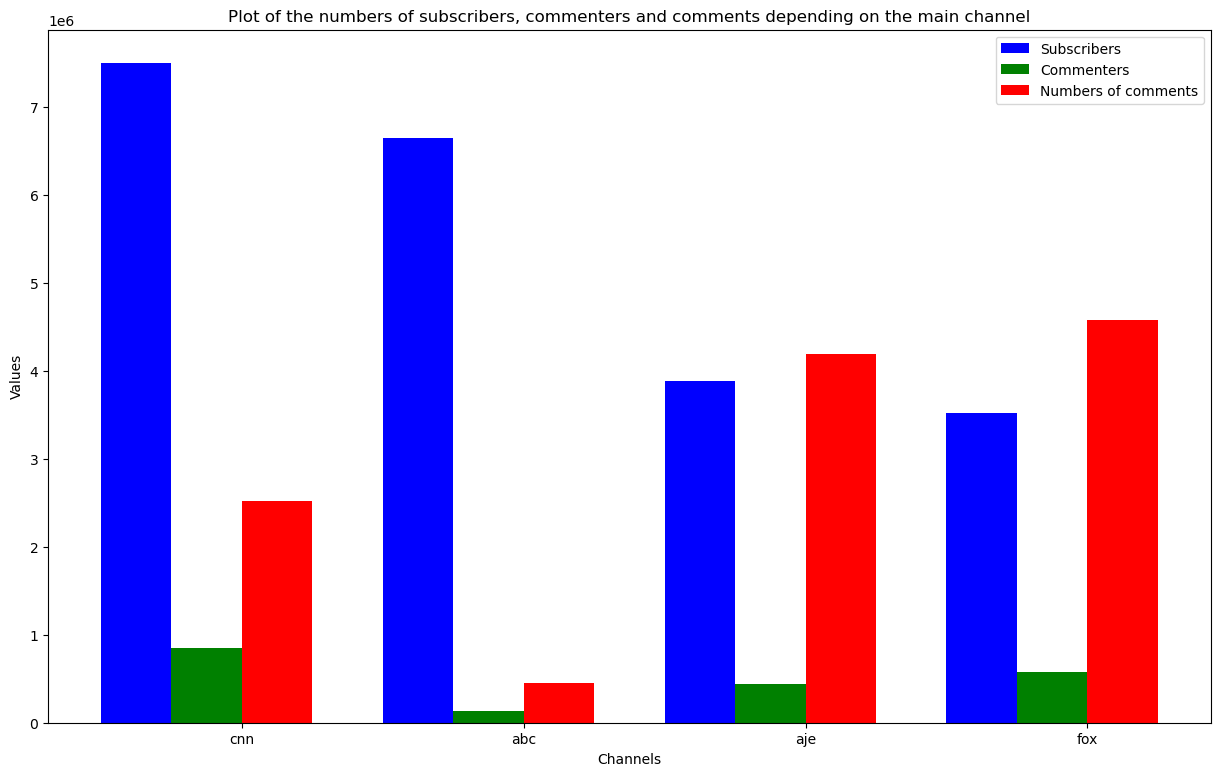

In [33]:
channels = ['cnn', 'abc', #bbc, 
                'aje', 'fox']
comments = [len(df_comments_news_pol_cnn), 
            #len(df_comments_news_pol_bbc), 
            len(df_comments_news_pol_abc), 
            len(df_comments_news_pol_aje), 
            len(df_comments_news_pol_fox)]
subscribers = [df_channels_news_pol[df_channels_news_pol.channel == channel_id_cnn].subscribers_cc.values[0], 
               #channel_id_bbc.subscribers_cc, 
               df_channels_news_pol[df_channels_news_pol.channel == channel_id_abc].subscribers_cc.values[0], 
               df_channels_news_pol[df_channels_news_pol.channel == channel_id_aje].subscribers_cc.values[0], 
               df_channels_news_pol[df_channels_news_pol.channel == channel_id_fox].subscribers_cc.values[0]]
# Calculate the number of unique authors that commented for each dataframe
commenters = [
    df_comments_news_pol_cnn['author'].nunique(),
    #df_comments_news_pol_bbc['author'].nunique(),
    df_comments_news_pol_abc['author'].nunique(),
    df_comments_news_pol_aje['author'].nunique(),
    df_comments_news_pol_fox['author'].nunique()
]

# Bar width
bar_width = 0.25
index = np.arange(len(channels))

# Fig
fig, ax = plt.subplots(figsize=(15, 9))

bar1 = ax.bar(index - bar_width, subscribers, bar_width, label='Subscribers', color='blue')
bar2 = ax.bar(index, commenters, bar_width, label='Commenters', color='green')
bar3 = ax.bar(index + bar_width, comments, bar_width, label='Numbers of comments', color='red')

# Labels and title
ax.set_xlabel('Channels')
ax.set_ylabel('Values')
ax.set_title('Plot of the numbers of subscribers, commenters and comments depending on the main channel')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(channels)

# Legend display
ax.legend()

plt.show()


### Distribution of comments - How many people comment frequently?

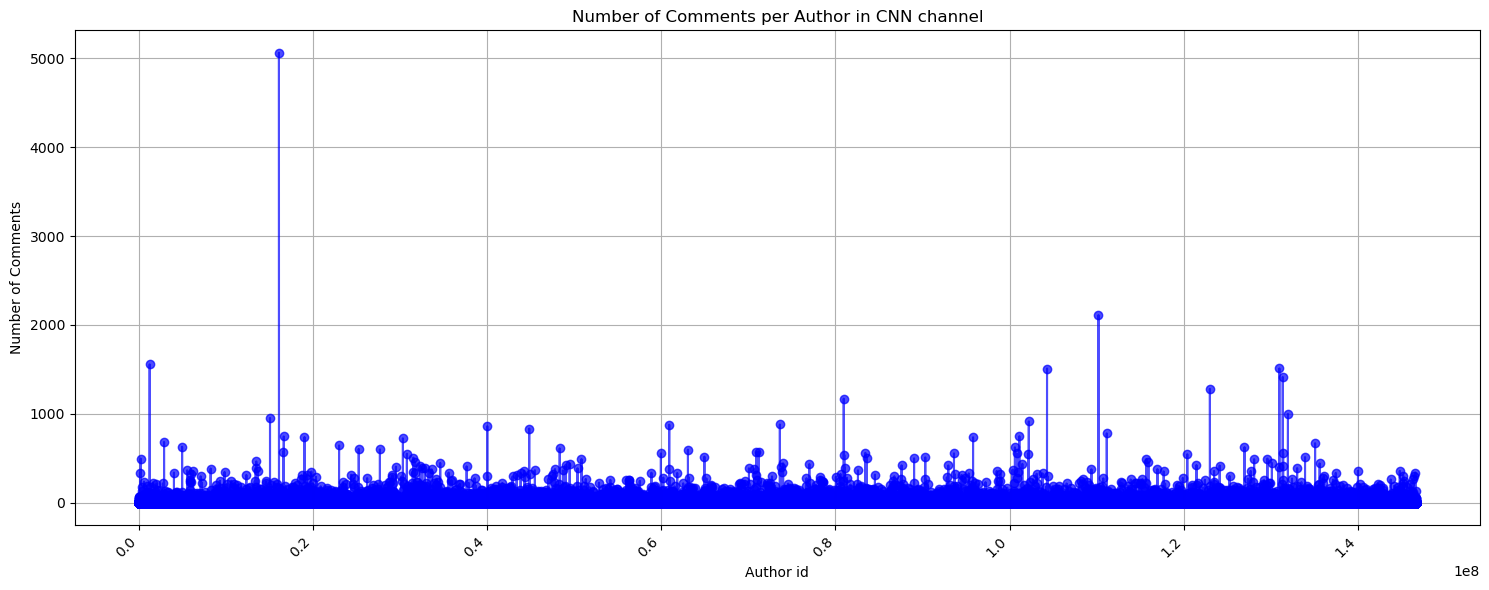

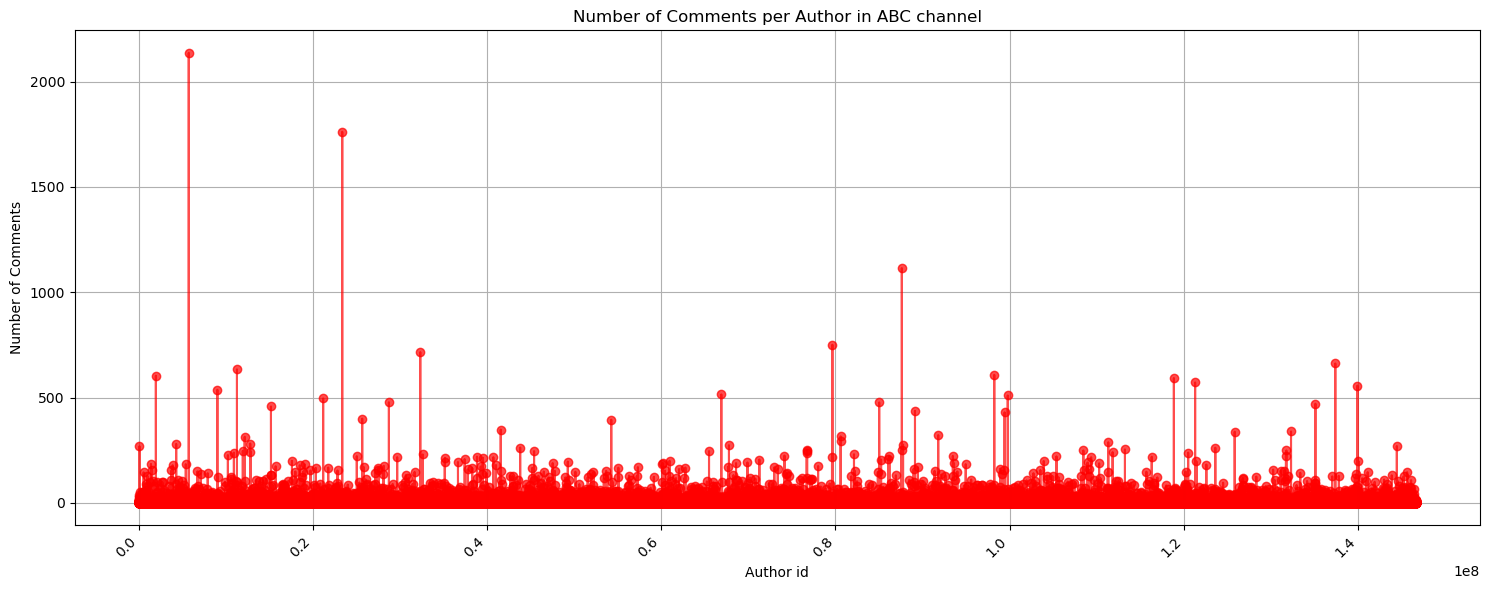

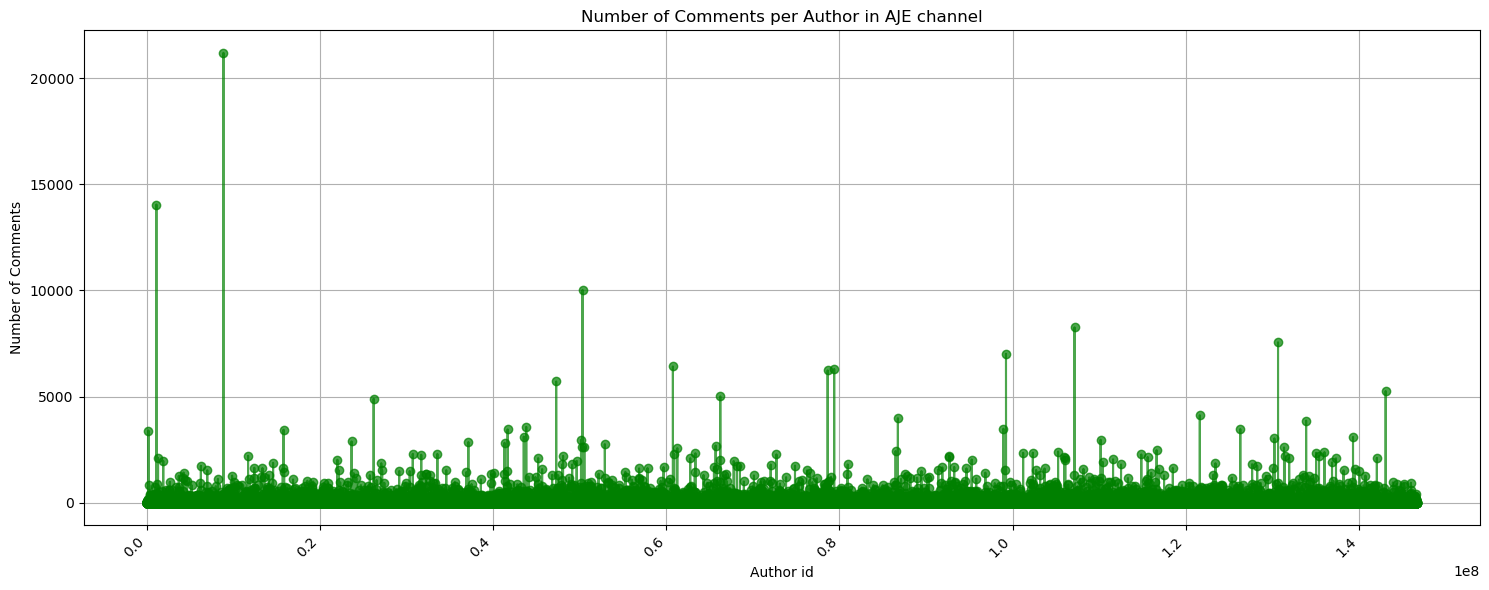

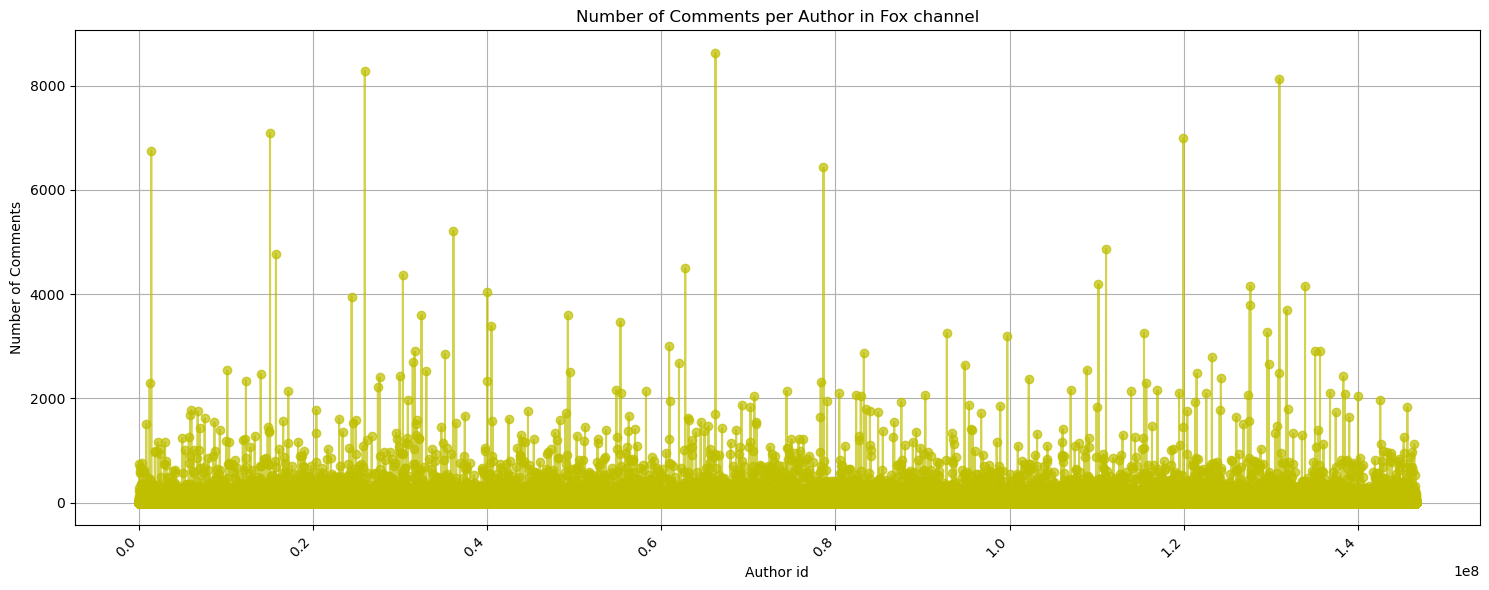

In [34]:
# Grouping by author to get the number of comments per author for each channel
comment_counts_cnn = df_comments_news_pol_cnn.groupby('author').size()
#comment_counts_bbc = df_comments_news_pol_bbc.groupby('author').size()
comment_counts_abc = df_comments_news_pol_abc.groupby('author').size()
comment_counts_aje = df_comments_news_pol_aje.groupby('author').size()
comment_counts_fox = df_comments_news_pol_fox.groupby('author').size()

# CNN 
plt.figure(figsize=(15, 6))
plt.plot(comment_counts_cnn.index, comment_counts_cnn, marker='o', color='b', alpha=0.7)  
plt.title('Number of Comments per Author in CNN channel')  
plt.xlabel('Author id') 
plt.ylabel('Number of Comments')  
plt.xticks(rotation=45, ha='right') 
plt.grid(True)  
plt.tight_layout() 
plt.show() 

"""
# BBC
plt.figure(figsize=(15, 6))
plt.plot(comment_counts_bbc.index, comment_counts_bbc, marker='o', color='b', alpha=0.7)  
plt.title('Number of Comments per Author in BBC channel')  
plt.xlabel('Author id') 
plt.ylabel('Number of Comments')  
plt.xticks(rotation=45, ha='right') 
plt.grid(True)  
plt.tight_layout() 
plt.show() 
"""
# ABC 
plt.figure(figsize=(15, 6))
plt.plot(comment_counts_abc.index, comment_counts_abc, marker='o', color='r', alpha=0.7)  
plt.title('Number of Comments per Author in ABC channel')  
plt.xlabel('Author id') 
plt.ylabel('Number of Comments')  
plt.xticks(rotation=45, ha='right') 
plt.grid(True)  
plt.tight_layout() 
plt.show() 


# AJE
plt.figure(figsize=(15, 6))
plt.plot(comment_counts_aje.index, comment_counts_aje, marker='o', color='g', alpha=0.7)  
plt.title('Number of Comments per Author in AJE channel')  
plt.xlabel('Author id') 
plt.ylabel('Number of Comments')  
plt.xticks(rotation=45, ha='right') 
plt.grid(True)  
plt.tight_layout() 
plt.show() 


# Fox
plt.figure(figsize=(15, 6))
plt.plot(comment_counts_fox.index, comment_counts_fox, marker='o', color='y', alpha=0.7)  
plt.title('Number of Comments per Author in Fox channel')  
plt.xlabel('Author id') 
plt.ylabel('Number of Comments')  
plt.xticks(rotation=45, ha='right') 
plt.grid(True)  
plt.tight_layout() 
plt.show() 


### Analysis 

One can clearly see that the distribution of number of comments per author is very broad, most of them doens't write a lot of comments, some have enormous values of comments. One things to notice is that Fox News seems to be the channels with the most activate users, some has commented over 8000 times !!! The others channels doesn't have more than 2000 comments per author, except for CNN which have one users up to 5000 comments

/var/folders/xn/s7sjqvj94tx3n1l14fcw6f240000gq/T/ipykernel_9556/3843391754.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  authors_per_bin_cnn.column_cnns = ['Comment Range', 'Number of Authors']


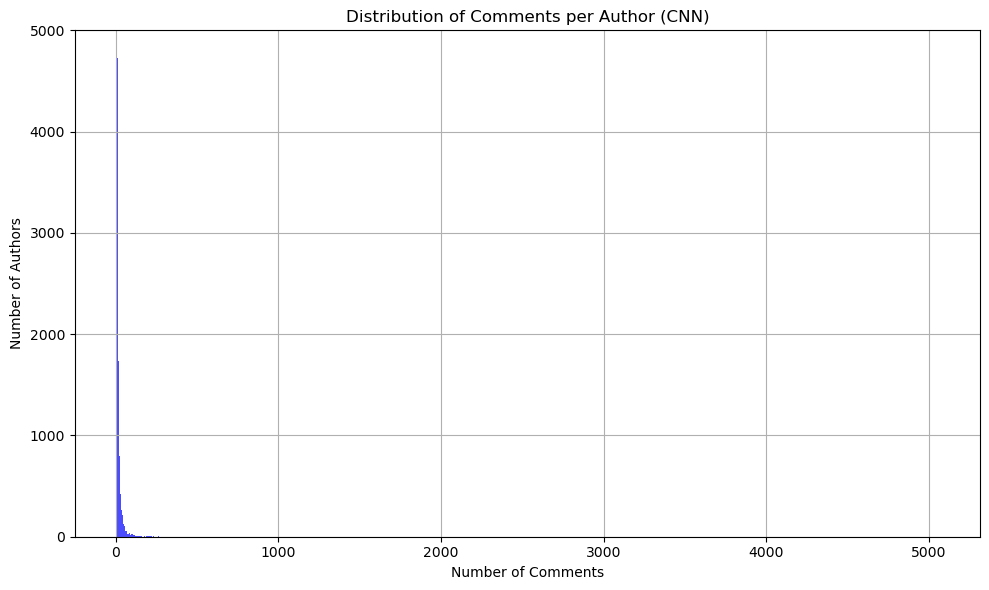

/var/folders/xn/s7sjqvj94tx3n1l14fcw6f240000gq/T/ipykernel_9556/3843391754.py:54: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  authors_per_bin_abc.column_abcs = ['Comment Range', 'Number of Authors']


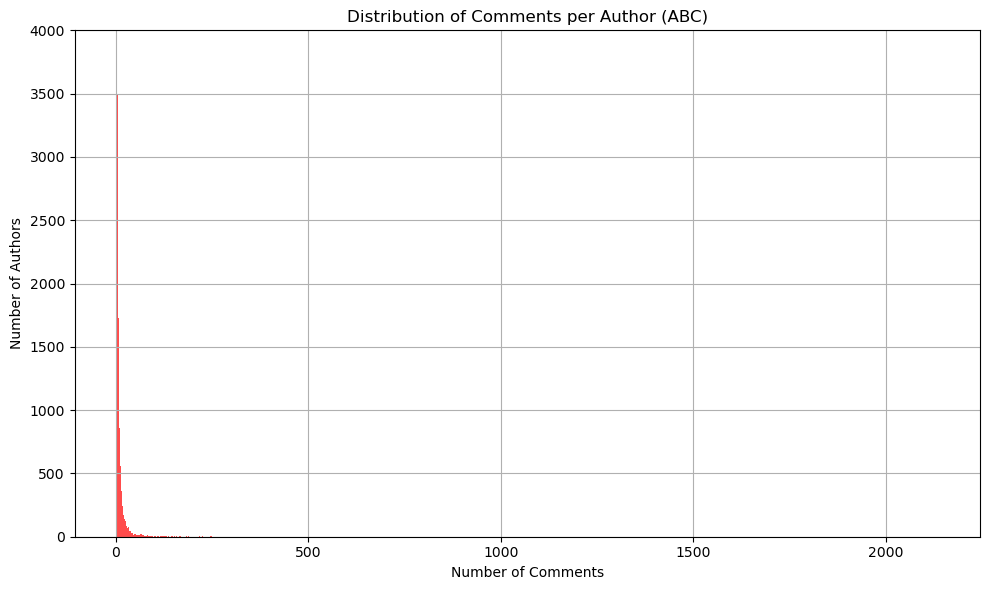

/var/folders/xn/s7sjqvj94tx3n1l14fcw6f240000gq/T/ipykernel_9556/3843391754.py:75: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  authors_per_bin_aje.column_ajes = ['Comment Range', 'Number of Authors']


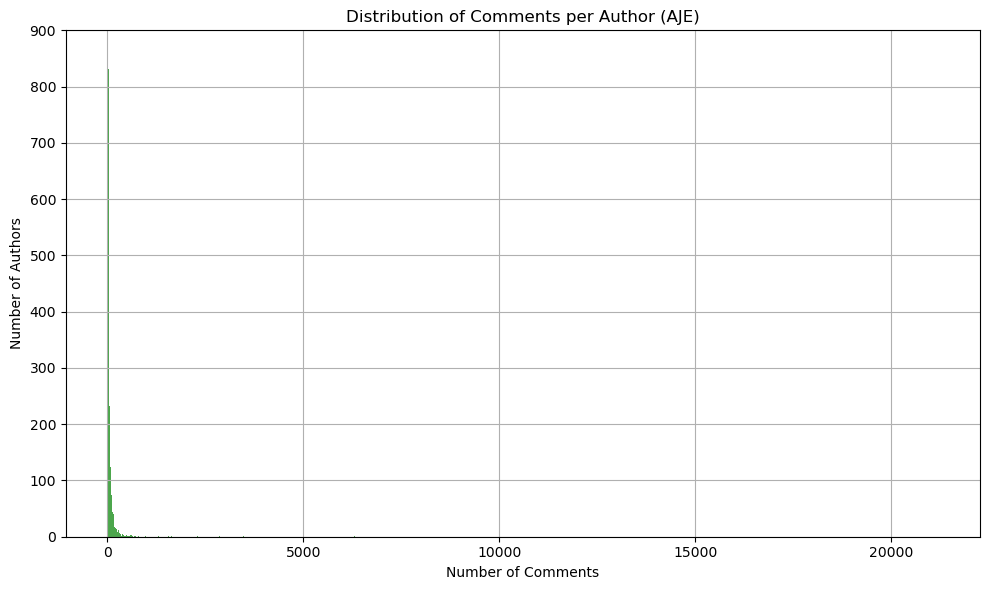

/var/folders/xn/s7sjqvj94tx3n1l14fcw6f240000gq/T/ipykernel_9556/3843391754.py:96: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  authors_per_bin_fox.column_foxs = ['Comment Range', 'Number of Authors']


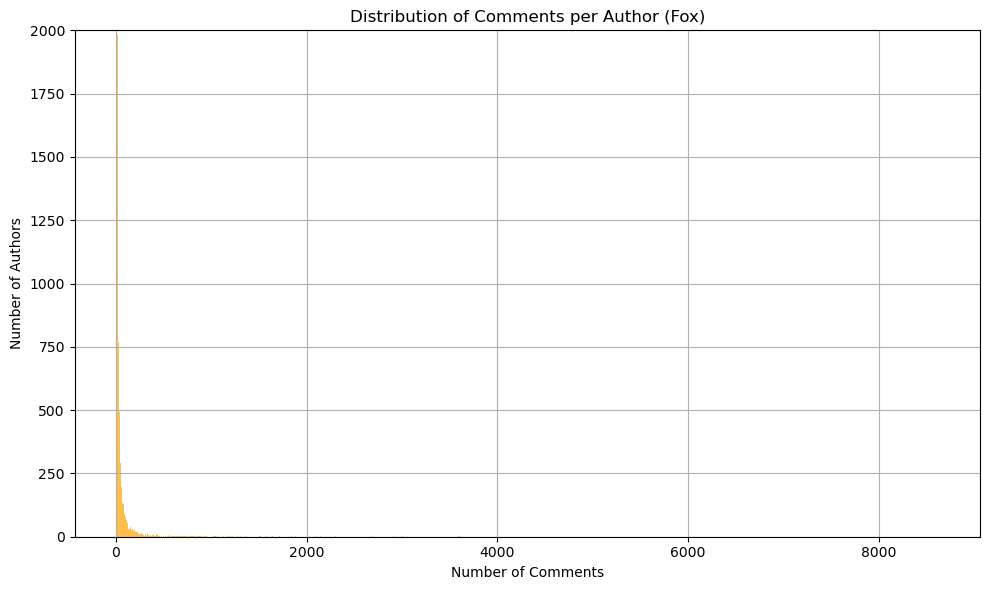

In [56]:

#CNN
#bins = range(0, comment_counts_cnn.max() + 10, 10)  # Create bins from 0 to max comments in steps of 10
bins = np.logspace(np.log10(1), np.log10(comment_counts_cnn.max()), num=20)
bin_labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Labels like '0-10', '10-20', etc.
# Use pd.cut to bin the comment counts 
comment_counts_binned_cnn = pd.cut(comment_counts_cnn, bins=bins, labels=bin_labels, right=False)
authors_per_bin_cnn = comment_counts_binned_cnn.value_counts().sort_index()
authors_per_bin_cnn = authors_per_bin_cnn.reset_index()
authors_per_bin_cnn.column_cnns = ['Comment Range', 'Number of Authors']


# Plot the histogram for CNN
plt.figure(figsize=(10,6))
plt.hist(comment_counts_cnn, bins=range(1, comment_counts_cnn.max() + 1), alpha=0.7, color = 'blue')
plt.title('Distribution of Comments per Author (CNN)')
plt.xlabel('Number of Comments')
plt.ylim(0,5000)
plt.ylabel('Number of Authors')
plt.grid(True)
plt.tight_layout()
plt.show() 

"""

#BBC
bins = range(0, comment_counts_bbc.max() + 10, 10)  # Create bins from 0 to max comments in steps of 10
bin_labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Labels like '0-10', '10-20', etc.
# Use pd.cut to bin the comment counts 
comment_counts_binned_bbc = pd.cut(comment_counts_bbc, bins=bins, labels=bin_labels, right=False)
authors_per_bin_bbc = comment_counts_binned_cnn.value_counts().sort_index()
authors_per_bin_bbc = authors_per_bin_cnn.reset_index()
authors_per_bin_bbc.column_bbcs = ['Comment Range', 'Number of Authors']


# Plot the histogram for BBC
plt.figure(figsize=(10,6))
plt.hist(comment_counts_bbc, bins=range(1, comment_counts_bbc.max() + 1), edgecolor='black', alpha=0.7)
plt.title('Distribution of Comments per Author (BBC)')
plt.xlabel('Number of Comments')
plt.ylim(0,2000)
plt.ylabel('Number of Authors')
plt.grid(True)
plt.tight_layout()
plt.show() 
"""

#ABC
bins = range(0, comment_counts_abc.max() + 10, 10)  # Create bins from 0 to max comments in steps of 10
bin_labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Labels like '0-10', '10-20', etc.
# Use pd.cut to bin the comment counts 
comment_counts_binned_abc = pd.cut(comment_counts_abc, bins=bins, labels=bin_labels, right=False)
authors_per_bin_abc = comment_counts_binned_abc.value_counts().sort_index()
authors_per_bin_abc = authors_per_bin_abc.reset_index()
authors_per_bin_abc.column_abcs = ['Comment Range', 'Number of Authors']


# Plot the histogram for ABC
plt.figure(figsize=(10,6))
plt.hist(comment_counts_abc, bins=range(1, comment_counts_abc.max() + 1), alpha=0.7, color= 'red')
plt.title('Distribution of Comments per Author (ABC)')
plt.xlabel('Number of Comments')
plt.ylim(0,4000)
plt.ylabel('Number of Authors')
plt.grid(True)
plt.tight_layout()
plt.show() 

#AJE
bins = range(0, comment_counts_aje.max() + 10, 10)  # Create bins from 0 to max comments in steps of 10
bin_labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Labels like '0-10', '10-20', etc.
# Use pd.cut to bin the comment counts 
comment_counts_binned_aje = pd.cut(comment_counts_aje, bins=bins, labels=bin_labels, right=False)
authors_per_bin_aje = comment_counts_binned_aje.value_counts().sort_index()
authors_per_bin_aje = authors_per_bin_aje.reset_index()
authors_per_bin_aje.column_ajes = ['Comment Range', 'Number of Authors']


# Plot the histogram for AJE
plt.figure(figsize=(10,6))
plt.hist(comment_counts_aje, bins=range(1, comment_counts_aje.max() + 1), alpha=0.7, color = 'green')
plt.title('Distribution of Comments per Author (AJE)')
plt.xlabel('Number of Comments')
plt.ylim(0,900)
plt.ylabel('Number of Authors')
plt.grid(True)
plt.tight_layout()
plt.show() 

#Fox
bins = range(0, comment_counts_fox.max() + 10, 10)  # Create bins from 0 to max comments in steps of 10
bin_labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Labels like '0-10', '10-20', etc.
# Use pd.cut to bin the comment counts 
comment_counts_binned_fox = pd.cut(comment_counts_cnn, bins=bins, labels=bin_labels, right=False)
authors_per_bin_fox = comment_counts_binned_fox.value_counts().sort_index()
authors_per_bin_fox = authors_per_bin_fox.reset_index()
authors_per_bin_fox.column_foxs = ['Comment Range', 'Number of Authors']


# Plot the histogram for CNN
plt.figure(figsize=(10,6))
plt.hist(comment_counts_fox, bins=range(1, comment_counts_fox.max() + 1), alpha=0.7, color = 'orange')
plt.title('Distribution of Comments per Author (Fox)')
plt.xlabel('Number of Comments')
plt.ylim(0,2000)
plt.ylabel('Number of Authors')
plt.grid(True)
plt.tight_layout()
plt.show() 



## Analysis

All the channels exhibit highly skewed distributions, with the key distinction being the range of comment counts across each channel. CNN seems to be the main channel with the most users that write a little numbers of comments, and AJE the smallest. What stands out in these distributions is that a small subset of authors contribute a disproportionately large number of comments, while the majority of authors contribute only a few. This suggests that the more active authors can be identified as distinct clusters based on their comment volume.

For better visualization, we will plot in log scale :

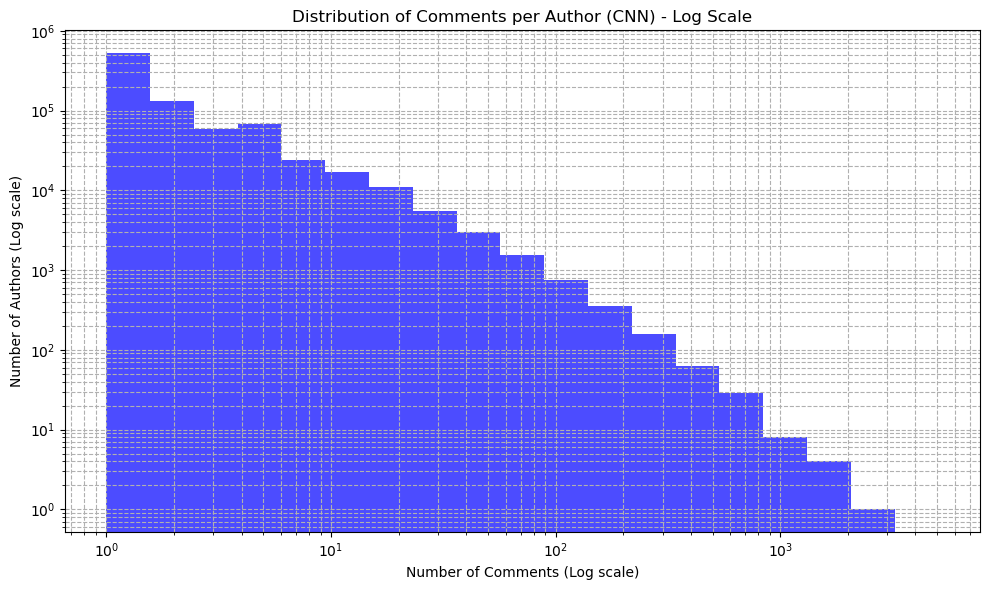

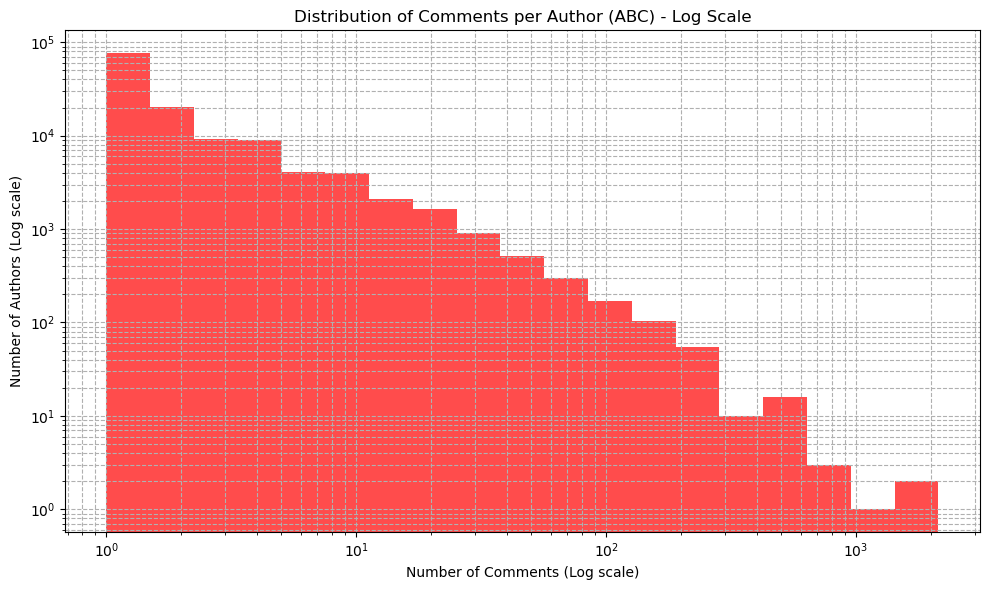

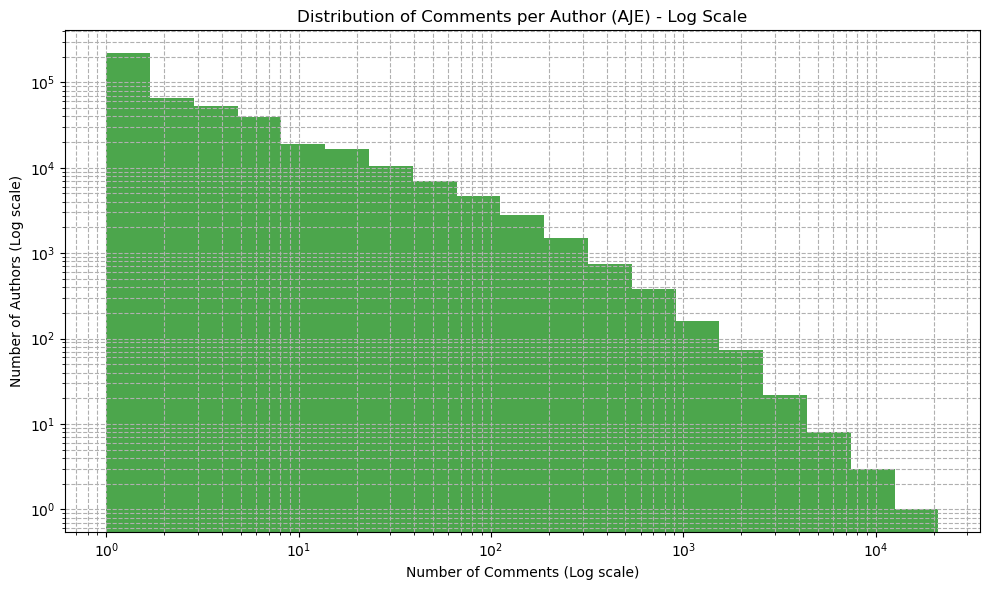

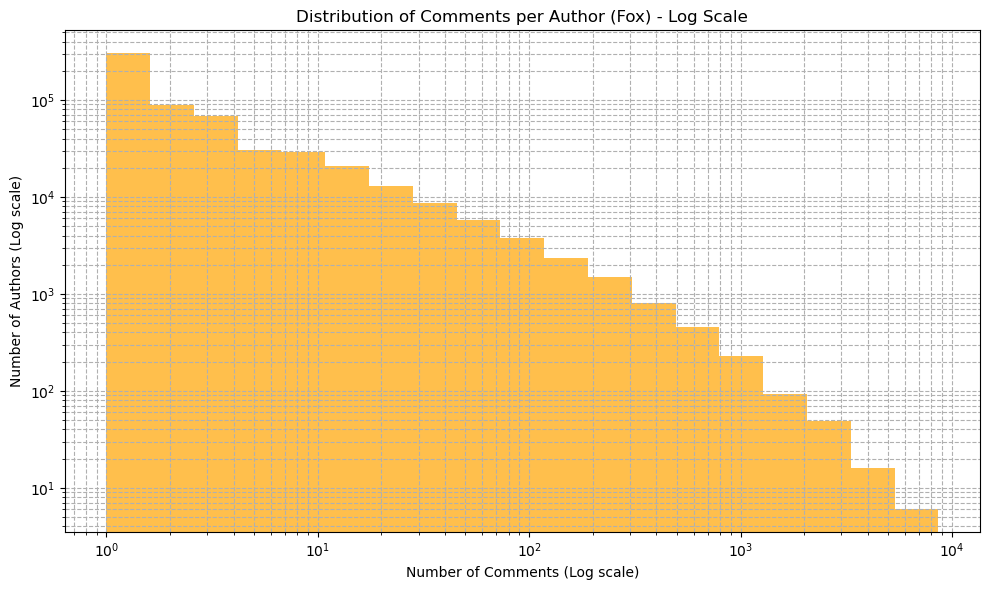

In [60]:
#CNN
#log for both x and y
log_bins = np.logspace(np.log10(1), np.log10(comment_counts_cnn.max()), num=20)  
bin_labels = [f'{int(log_bins[i])}-{int(log_bins[i+1])}' for i in range(len(log_bins)-1)] 

comment_counts_binned_cnn = pd.cut(comment_counts_cnn, bins=log_bins, labels=bin_labels, right=False)

authors_per_bin_cnn = comment_counts_binned_cnn.value_counts().sort_index()
authors_per_bin_cnn = authors_per_bin_cnn.reset_index()
authors_per_bin_cnn.columns = ['Comment Range', 'Number of Authors']

plt.figure(figsize=(10,6))
plt.hist(comment_counts_cnn, bins=log_bins, alpha=0.7, color='blue')
plt.xscale('log')  
plt.yscale('log')  
plt.title('Distribution of Comments per Author (CNN) - Log Scale')
plt.xlabel('Number of Comments (Log scale)')
plt.ylabel('Number of Authors (Log scale)')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


"""
#BBC
#log for both x and y
log_bins = np.logspace(np.log10(1), np.log10(comment_counts_bbc.max()), num=20)  
bin_labels = [f'{int(log_bins[i])}-{int(log_bins[i+1])}' for i in range(len(log_bins)-1)] 

comment_counts_binned_bbc = pd.cut(comment_counts_bbc, bins=log_bins, labels=bin_labels, right=False)

authors_per_bin_bbc = comment_counts_binned_bbc.value_counts().sort_index()
authors_per_bin_bbc = authors_per_bin_bbc.reset_index()
authors_per_bin_bbc.columns = ['Comment Range', 'Number of Authors']

plt.figure(figsize=(10,6))
plt.hist(comment_counts_bbc, bins=log_bins, alpha=0.7, color='blue')
plt.xscale('log')  
plt.yscale('log')  
plt.title('Distribution of Comments per Author (BBC) - Log Scale')
plt.xlabel('Number of Comments (Log scale)')
plt.ylabel('Number of Authors (Log scale)')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()
"""


#ABC
#log for both x and y
log_bins = np.logspace(np.log10(1), np.log10(comment_counts_abc.max()), num=20)  
bin_labels = [f'{int(log_bins[i])}-{int(log_bins[i+1])}' for i in range(len(log_bins)-1)] 

comment_counts_binned_abc = pd.cut(comment_counts_abc, bins=log_bins, labels=bin_labels, right=False)

authors_per_bin_abc = comment_counts_binned_abc.value_counts().sort_index()
authors_per_bin_abc = authors_per_bin_abc.reset_index()
authors_per_bin_abc.columns = ['Comment Range', 'Number of Authors']

plt.figure(figsize=(10,6))
plt.hist(comment_counts_abc, bins=log_bins, alpha=0.7, color='red')
plt.xscale('log')  
plt.yscale('log')  
plt.title('Distribution of Comments per Author (ABC) - Log Scale')
plt.xlabel('Number of Comments (Log scale)')
plt.ylabel('Number of Authors (Log scale)')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()



#AJE
#log for both x and y
log_bins = np.logspace(np.log10(1), np.log10(comment_counts_aje.max()), num=20)  
bin_labels = [f'{int(log_bins[i])}-{int(log_bins[i+1])}' for i in range(len(log_bins)-1)] 

comment_counts_binned_aje = pd.cut(comment_counts_aje, bins=log_bins, labels=bin_labels, right=False)

authors_per_bin_aje = comment_counts_binned_aje.value_counts().sort_index()
authors_per_bin_aje = authors_per_bin_aje.reset_index()
authors_per_bin_aje.columns = ['Comment Range', 'Number of Authors']

plt.figure(figsize=(10,6))
plt.hist(comment_counts_aje, bins=log_bins, alpha=0.7, color='green')
plt.xscale('log')  
plt.yscale('log')  
plt.title('Distribution of Comments per Author (AJE) - Log Scale')
plt.xlabel('Number of Comments (Log scale)')
plt.ylabel('Number of Authors (Log scale)')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()



#Fox
#log for both x and y
log_bins = np.logspace(np.log10(1), np.log10(comment_counts_fox.max()), num=20)  
bin_labels = [f'{int(log_bins[i])}-{int(log_bins[i+1])}' for i in range(len(log_bins)-1)] 

comment_counts_binned_fox = pd.cut(comment_counts_fox, bins=log_bins, labels=bin_labels, right=False)

authors_per_bin_fox = comment_counts_binned_fox.value_counts().sort_index()
authors_per_bin_fox = authors_per_bin_fox.reset_index()
authors_per_bin_fox.columns = ['Comment Range', 'Number of Authors']

plt.figure(figsize=(10,6))
plt.hist(comment_counts_fox, bins=log_bins, alpha=0.7, color='orange')
plt.xscale('log')  
plt.yscale('log')  
plt.title('Distribution of Comments per Author (Fox) - Log Scale')
plt.xlabel('Number of Comments (Log scale)')
plt.ylabel('Number of Authors (Log scale)')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


## Selecting the cluster of users in a specific channel 

(flexible function where you give the threshold of x comments)


In [40]:
#returns df with users_id and total number of comments made in a specific channel
def get_metadata_commenters(comment_data: pd.DataFrame, threshold: int = 0) -> pd.DataFrame:
    """
    Generates a dataframe with comment count and number of videos commented under, 
    for each person that has commented.
    Works on any df containing a set of comment data 
    (e.g., filtered to contain only comments under videos from a certain channel).

    Args:
        comment_data: df containing the comments for which to generate metadata
        threshold: (default 0) only commenters with more than this amount of comments 
            will be included in the dataframe.

    Returns:
        df with columns author, number of comments and number of videos
    """

    metadata_commenters = comment_data.groupby('author').agg(number_of_comments=('author', 'size')).reset_index()
    metadata_commenters['number_of_videos']= comment_data.groupby('author')['video_id'].nunique().values
    
    #keep users that wrote more than <threshold> comments 
    metadata_commenters=metadata_commenters[metadata_commenters['number_of_comments']>=threshold]
    return metadata_commenters


threshold = 10  # decide this based on the distributions of comments for the 5 channels

metadata_commenters_news_pol_selected_channels_filepaths = [
    dataset_root_path + "../generated_data/metadata_commenters_news_pol_" + channel + ".csv" 
    for channel in ["cnn", "abc", #"bbc", 
                    "aje", "fox"]
    ]

if np.all([os.path.isfile(filepath) for filepath in metadata_commenters_news_pol_selected_channels_filepaths]):
    metadata_commenters_news_pol_cnn = pd.read_csv(metadata_commenters_news_pol_selected_channels_filepaths[0])
    metadata_commenters_news_pol_abc = pd.read_csv(metadata_commenters_news_pol_selected_channels_filepaths[1])
    #metadata_commenters_news_pol_bbc = pd.read_csv(metadata_commenters_news_pol_selected_channels_filepaths[2])
    metadata_commenters_news_pol_aje = pd.read_csv(metadata_commenters_news_pol_selected_channels_filepaths[2])
    metadata_commenters_news_pol_fox = pd.read_csv(metadata_commenters_news_pol_selected_channels_filepaths[3])
    print("Read 4 (soon 5) dfs from file")
else:
    # group the comments by channel
    df_comments_news_pol_manually_selected_grouped = df_comments_news_pol_manually_selected.groupby("channel_id")
    
    # save the groups to new dfs
    (metadata_commenters_news_pol_cnn,
     metadata_commenters_news_pol_abc,
     #metadata_commenters_news_pol_bbc,
     metadata_commenters_news_pol_aje,
     metadata_commenters_news_pol_fox) = (get_metadata_commenters(df_comments, threshold)
                                          for df_comments in [df_comments_news_pol_cnn,
                                                              df_comments_news_pol_abc,
                                                              # df_comments_news_pol_bbc,
                                                              df_comments_news_pol_aje,
                                                              df_comments_news_pol_fox])
    
    # save the new dfs to csv
    metadata_commenters_news_pol_cnn.to_csv(metadata_commenters_news_pol_selected_channels_filepaths[0], index=False)
    metadata_commenters_news_pol_abc.to_csv(metadata_commenters_news_pol_selected_channels_filepaths[1], index=False)
    #metadata_commenters_news_pol_bbc.to_csv(metadata_commenters_news_pol_selected_channels_filepaths[2], index=False)
    metadata_commenters_news_pol_aje.to_csv(metadata_commenters_news_pol_selected_channels_filepaths[2], index=False)
    metadata_commenters_news_pol_fox.to_csv(metadata_commenters_news_pol_selected_channels_filepaths[3], index=False)




#putting, for now, a randomn thresold to see if function  is working
#testing for cnn channel
metadata_commenters_news_pol_cnn_0 = get_metadata_commenters(df_comments_news_pol_cnn,0)

metadata_commenters_news_pol_cnn_0.to_csv(dataset_root_path + "../generated_data/commenter_metadata_news_pol_cnn.csv", index=False)

# display cnn data as an example
display(metadata_commenters_news_pol_cnn_0.head())
# display sizes of all 5 dfs
display(metadata_commenters_news_pol_cnn_0.shape)

#change thresold 

metadata_commenters_news_pol_cnn_500 = get_metadata_commenters(df_comments_news_pol_cnn,500)
metadata_commenters_news_pol_cnn_500.to_csv(dataset_root_path + "../generated_data/commenter_metadata_news_pol_cnn.csv", index=False)

# display cnn data as an example
display(metadata_commenters_news_pol_cnn_500.head())
# display sizes of all 5 dfs
display(metadata_commenters_news_pol_cnn_500.shape)


Read 4 (soon 5) dfs from file


,author,number_of_comments,number_of_videos
0,30,2,1
1,269,1,1
2,336,1,1
3,466,1,1
4,617,1,1


(846400, 3)

,author,number_of_comments,number_of_videos
7332,1263561,1557,777
16894,2915771,684,350
28847,4988158,630,188
86639,15081791,954,288
92517,16106749,5061,1600


(49, 3)

'\ndisplay(metadata_commenters_news_pol_abc.shape)\n#display(metadata_commenters_news_pol_bbc.shape)\ndisplay(metadata_commenters_news_pol_aje.shape)\ndisplay(metadata_commenters_news_pol_fox.shape)\n'

#### Now the goal is to define a thresold --> Milestone 3

Median ? Manually selected ? --> to be determined

# Deeper analysis and statistics

## Determining the mean pairwise overlap of commented videos for users in our clusters

Here, we are going to get, for each defined cluster, for each pair of users in the clusters, the lists of videos they have commented on. Then we compare these lists to get the common elements, i.e., videos both of these users have commented on. We can then divide this by the smaller length of the two lists of videos, thereby getting the fraction of commented videos these two users have in common. We call this "pairwise overlap of commented videos".

Then, we can for instance calculate the mean pairwise overlap for all users in each cluster, and compare this among the clusters. In particular, we can use a random sample of YouTube users, define this as a cluster, and calculate the mean pairwise overlap for these users as well. By comparing this to the values for each of our original clusters (which were based on number of comments under a specific channel, such as CNN), we can see whether we have a higher mean pairwise overlap for users that comment frequently under a specific channel than for a random reference sample of users; suggesting that they might have a larger overlap in their interests or at least YouTube watching behaviour.

### Getting the required data

First, we will need to get for every user (from the considered cluster) the list of video they have commented on.

For this, we have the below function, which takes a dataframe with comment data and a list of users, and creates a dataframe which has a column with user ids and one column with lists of videos the corresponding user has commented on.

The comments in news and politics videos are however too large a dataset to be handled at once, it needs to be done in chunks. Combining the video lists from the different chunks to a single dataframe still needs to be implemented. But, we show that it works by running it on the first chunk of the cnn comment data.


It is not possible to make e.g. a dataframe with the video ids as rows, the user ids as columns, and the entries as booleans showing whether the user has commented on the video, even though it would be a useful format; as this dataframe would be far too big and takes far too long to generate. Nevertheless, we have implemented a function doing this, in case we want to generate a dataframe like that for a smaller subset of comments and users in the future.

In [1]:
def get_video_list_for_given_users(comment_data: pd.DataFrame, users: pd.DataFrame, video_ids: pd.DataFrame)-> pd.DataFrame:
    """
    Creates a df with one column for users 
    and one column with the list of videos that user has commented on.
    Args:
        comment_data: a df containing the comments to go through
        users: the list of users to do this for
        
    Returns:
        df as described above
    """
    
    comments_by_given_users_grouped = comment_data.loc[comment_data.author.isin(users)].groupby("author")
    video_ids_of_comments_by_given_users_grouped = comments_by_given_users_grouped['video_id']

    return pd.DataFrame({'author': video_ids_of_comments_by_given_users_grouped.groups.keys(), 
                         'video_list': [comment_data.loc[vid_ids].video_id for vid_ids in video_ids_of_comments_by_given_users_grouped.groups.values()]})


video_list_for_cnn_cluster__chunk_1_filename = dataset_root_path + "../generated_data/video_list_cnn_cluster_chunk_1.json"

if os.path.isfile(video_list_for_cnn_cluster__chunk_1_filename):
    df_video_list_for_cnn_cluster_chunk_1 = pd.read_json(video_list_for_cnn_cluster__chunk_1_filename)
else:
    for i, df_comments_news_pol_chunk in enumerate(pd.read_csv(comments_news_pol_videos_filepath, chunksize=1000000)):
        if i > 0:
            break
        df_video_list_for_cnn_cluster_chunk_1 = get_video_list_for_given_users(df_comments_news_pol_chunk, df_comments_news_pol_cnn.author, df_videos_news_pol_display_ids)
        
        df_video_list_for_cnn_cluster_chunk_1.to_json(video_list_for_cnn_cluster__chunk_1_filename, index=False)
        
    
display(df_video_list_for_cnn_cluster_chunk_1)

NameError: name 'pd' is not defined

In [ ]:
# this function does not run on the sizes of comment and user data we are handling at this point, therefore, it has not been run

def get_video_user_comment_matrix(comment_data: pd.DataFrame, users: pd.DataFrame, video_ids: pd.DataFrame)-> pd.DataFrame:
    """
    Creates a df with video ids as rows, user ids as columns, and the entries being booleans showing whether the user has commented.
    and one column with the list of videos that user has commented on.
    Args:
        comment_data: a df containing the comments to go through
        users: the list of users to do this for
        video_ids: the video ids to check for
    Returns:
        df as described above
    """

    comments_by_given_users_grouped = comment_data.loc[comment_data.author.isin(users)].groupby("author")
    video_ids_of_comments_by_given_users_grouped = comments_by_given_users_grouped['video_id']

    # display(video_ids_of_comments_by_given_users_grouped.groups)
    time_start_unique=time.time()
    unique_videos = video_ids.display_id.drop_duplicates()
    time_end_unique=time.time()
    print(f"time finding unique: {time_end_unique - time_start_unique}")
    return pd.DataFrame({user: unique_videos.isin([comment_data.loc[vid_indices].video_id ]) 
                         for (user, vid_indices) in video_ids_of_comments_by_given_users_grouped.groups.items()},
                         index=unique_videos)


OSError: [Errno 5] Input/output error

In [164]:
display(df_video_list_for_cnn_cluster)

,author,video_list
0,30,"Index([3, 4, 5], dtype='int64')"
1,269,"Index([45, 46, 47, 48, 49], dtype='int64')"
2,336,"Index([62], dtype='int64')"
3,466,"Index([71], dtype='int64')"
4,617,"Index([99, 100, 101, 102], dtype='int64')"
...,...,...
6414,46205861,"Index([29724244, 29724245, 29724246, 29724247,..."
6415,46206002,"Index([29724284, 29724285, 29724286, 29724287,..."
6416,46206010,"Index([29724296, 29724297, 29724298, 29724299]..."
6417,46206058,"Index([29724357, 29724358, 29724359, 29724360,..."
